# Import Libraries & DataSet

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
import tkinter as tk
from tkinter import messagebox

# Load Dataset

In [ ]:
df = pd.read_csv('capitals_dataset_Final_Corpus_FINAL (1).csv')

# DISPLAY DATASET

In [ ]:
df.head()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23
1,"🖌️ Morgan’s designs were not good, even with g...",Negative,Creative Capital,2597,Flickr,2024-05-30,08:39:42,Thursday,France,16
2,🔄 He repeats bad failures. 🔄,Negative,Human Leadership Capital,7841,Instagram,2024-02-27,08:39:36,Tuesday,Sweden,15
3,😠 Poor emotional handling led to not good team...,Negative,Emotional Capital,8860,Baidu Tieba,2024-05-18,08:39:38,Saturday,Philippines,16
4,🎓 Years of practical work built my confidence!,Positive,Experiential Capital,8392,TikTok,2024-02-22,08:39:41,Thursday,Thailand,42


In [ ]:
df.tail()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User
336024,🌟 Faith is not bad for providing strength and ...,Positive,Religious Capital,7677,Tumblr,2023-12-25,08:39:37,Monday,Iran,18
336025,😟 A damaged reputation hindered their competit...,Negative,Reputational Capital,4455,Instagram,2023-12-26,08:39:42,Tuesday,Italy,23
336026,😔 Negative interactions cause disruption in gr...,Negative,Social Capital,9732,Twitter,2023-11-06,08:39:37,Monday,Sweden,27
336027,"🤝 The community didn't lack strong support, cr...",Positive,Social Capital,4801,Periscope,2023-12-09,08:39:37,Saturday,Canada,20
336028,🔋 The solar-powered devices contributed to sus...,Positive,Physical Capital,1056,YouTube,2024-08-04,08:39:40,Sunday,Egypt,29


# Data Set Shape

In [ ]:
df.shape

(336029, 10)

# CHECKING DTYPES

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336029 entries, 0 to 336028
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Capitals Text Generation  336029 non-null  object
 1   Sentiment Label           336029 non-null  object
 2   Predicted Capital         336029 non-null  object
 3   User-Id                   336029 non-null  int64 
 4   Social-Accounts           336029 non-null  object
 5   Date                      336029 non-null  object
 6   Time                      336029 non-null  object
 7   Day                       336029 non-null  object
 8   Country                   336029 non-null  object
 9   Age-Of-User               336029 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 25.6+ MB


# Summary Statistics

In [ ]:
df.describe()

,User-Id,Age-Of-User
count,336029.000000,336029.000000
mean,5500.486863,34.939966
std,2600.973136,17.071688
min,1000.000000,13.000000
25%,3244.000000,19.000000
50%,5501.000000,32.000000
75%,7760.000000,47.000000
max,9999.000000,75.000000


# Step 1: Data Preprocessing


# Define function to remove emojis and unnecessary characters

In [ ]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text


In [ ]:
df['Clean_Capitals Text Generation'] = df['Capitals Text Generation'].apply(remove_unnecessary_characters)

# Display the first few rows to check the cleaning

In [ ]:
df.head()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User,Clean_Capitals Text Generation
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23,Financial growth is not good
1,"🖌️ Morgan’s designs were not good, even with g...",Negative,Creative Capital,2597,Flickr,2024-05-30,08:39:42,Thursday,France,16,Morgans designs were not good even with good f...
2,🔄 He repeats bad failures. 🔄,Negative,Human Leadership Capital,7841,Instagram,2024-02-27,08:39:36,Tuesday,Sweden,15,He repeats bad failures
3,😠 Poor emotional handling led to not good team...,Negative,Emotional Capital,8860,Baidu Tieba,2024-05-18,08:39:38,Saturday,Philippines,16,Poor emotional handling led to not good team d...
4,🎓 Years of practical work built my confidence!,Positive,Experiential Capital,8392,TikTok,2024-02-22,08:39:41,Thursday,Thailand,42,Years of practical work built my confidence


# TOKENIZATION

In [ ]:
import nltk
from nltk.tokenize import word_tokenize


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Ensure the necessary NLTK data is downloaded
nltk.download('punkt')

# Define the function to tokenize text
def tokenize_text(text):
    try:
        # Convert the input to string format
        text = str(text)
        # Tokenize the text
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        # Print any errors encountered during tokenization
        print(f"Error tokenizing text: {e}")
        return []

# Apply the function to the 'Clean_Capitals Text Generation' column of the DataFrame
df['Tokens'] = df['Clean_Capitals Text Generation'].apply(tokenize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User,Clean_Capitals Text Generation,Tokens
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23,Financial growth is not good,"[Financial, growth, is, not, good]"
1,"🖌️ Morgan’s designs were not good, even with g...",Negative,Creative Capital,2597,Flickr,2024-05-30,08:39:42,Thursday,France,16,Morgans designs were not good even with good f...,"[Morgans, designs, were, not, good, even, with..."
2,🔄 He repeats bad failures. 🔄,Negative,Human Leadership Capital,7841,Instagram,2024-02-27,08:39:36,Tuesday,Sweden,15,He repeats bad failures,"[He, repeats, bad, failures]"
3,😠 Poor emotional handling led to not good team...,Negative,Emotional Capital,8860,Baidu Tieba,2024-05-18,08:39:38,Saturday,Philippines,16,Poor emotional handling led to not good team d...,"[Poor, emotional, handling, led, to, not, good..."
4,🎓 Years of practical work built my confidence!,Positive,Experiential Capital,8392,TikTok,2024-02-22,08:39:41,Thursday,Thailand,42,Years of practical work built my confidence,"[Years, of, practical, work, built, my, confid..."


# Data Normalization

In [ ]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    else:
        text = str(text)  # Convert non-string inputs to string
    return text

# Apply normalize_text function to the 'clean_Capitals Text Generation' column
df['Normalized_text'] = df['Clean_Capitals Text Generation'].apply(normalize_text)

In [ ]:
df.head()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User,Clean_Capitals Text Generation,Tokens,Normalized_text
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23,Financial growth is not good,"[Financial, growth, is, not, good]",financial growth is not good
1,"🖌️ Morgan’s designs were not good, even with g...",Negative,Creative Capital,2597,Flickr,2024-05-30,08:39:42,Thursday,France,16,Morgans designs were not good even with good f...,"[Morgans, designs, were, not, good, even, with...",morgans designs were not good even with good f...
2,🔄 He repeats bad failures. 🔄,Negative,Human Leadership Capital,7841,Instagram,2024-02-27,08:39:36,Tuesday,Sweden,15,He repeats bad failures,"[He, repeats, bad, failures]",he repeats bad failures
3,😠 Poor emotional handling led to not good team...,Negative,Emotional Capital,8860,Baidu Tieba,2024-05-18,08:39:38,Saturday,Philippines,16,Poor emotional handling led to not good team d...,"[Poor, emotional, handling, led, to, not, good...",poor emotional handling led to not good team d...
4,🎓 Years of practical work built my confidence!,Positive,Experiential Capital,8392,TikTok,2024-02-22,08:39:41,Thursday,Thailand,42,Years of practical work built my confidence,"[Years, of, practical, work, built, my, confid...",years of practical work built my confidence


# Removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
df['Text_without_stopwords'] = df['Tokens'].apply(lambda tokens: ' '.join([word for word in tokens if word.lower() not in stop_words]))

In [ ]:
# Display a few examples of the cleaned text
print(df[['Text_without_stopwords']].head())

                             Text_without_stopwords
0                             Financial growth good
1  Morgans designs good even good feedback received
2                              repeats bad failures
3    Poor emotional handling led good team dynamics
4             Years practical work built confidence


In [ ]:
df.head()

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User,Clean_Capitals Text Generation,Tokens,Normalized_text,Text_without_stopwords
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23,Financial growth is not good,"[Financial, growth, is, not, good]",financial growth is not good,Financial growth good
1,"🖌️ Morgan’s designs were not good, even with g...",Negative,Creative Capital,2597,Flickr,2024-05-30,08:39:42,Thursday,France,16,Morgans designs were not good even with good f...,"[Morgans, designs, were, not, good, even, with...",morgans designs were not good even with good f...,Morgans designs good even good feedback received
2,🔄 He repeats bad failures. 🔄,Negative,Human Leadership Capital,7841,Instagram,2024-02-27,08:39:36,Tuesday,Sweden,15,He repeats bad failures,"[He, repeats, bad, failures]",he repeats bad failures,repeats bad failures
3,😠 Poor emotional handling led to not good team...,Negative,Emotional Capital,8860,Baidu Tieba,2024-05-18,08:39:38,Saturday,Philippines,16,Poor emotional handling led to not good team d...,"[Poor, emotional, handling, led, to, not, good...",poor emotional handling led to not good team d...,Poor emotional handling led good team dynamics
4,🎓 Years of practical work built my confidence!,Positive,Experiential Capital,8392,TikTok,2024-02-22,08:39:41,Thursday,Thailand,42,Years of practical work built my confidence,"[Years, of, practical, work, built, my, confid...",years of practical work built my confidence,Years practical work built confidence


# SENTIMENT VALUECOUNTS

<ipython-input-25-4080150020>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment Label', palette='viridis')


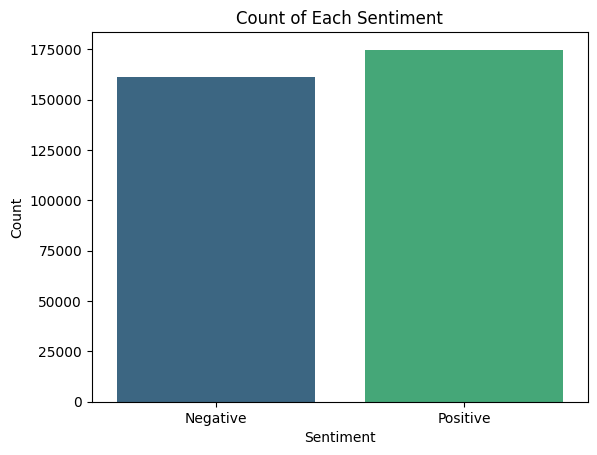

In [ ]:
sns.countplot(data=df, x='Sentiment Label', palette='viridis')
plt.title('Count of Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


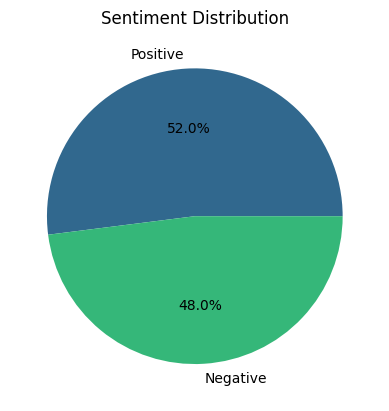

In [ ]:
df['Sentiment Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', len(df['Sentiment Label'].unique())))
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


In [ ]:
!pip install wordcloud


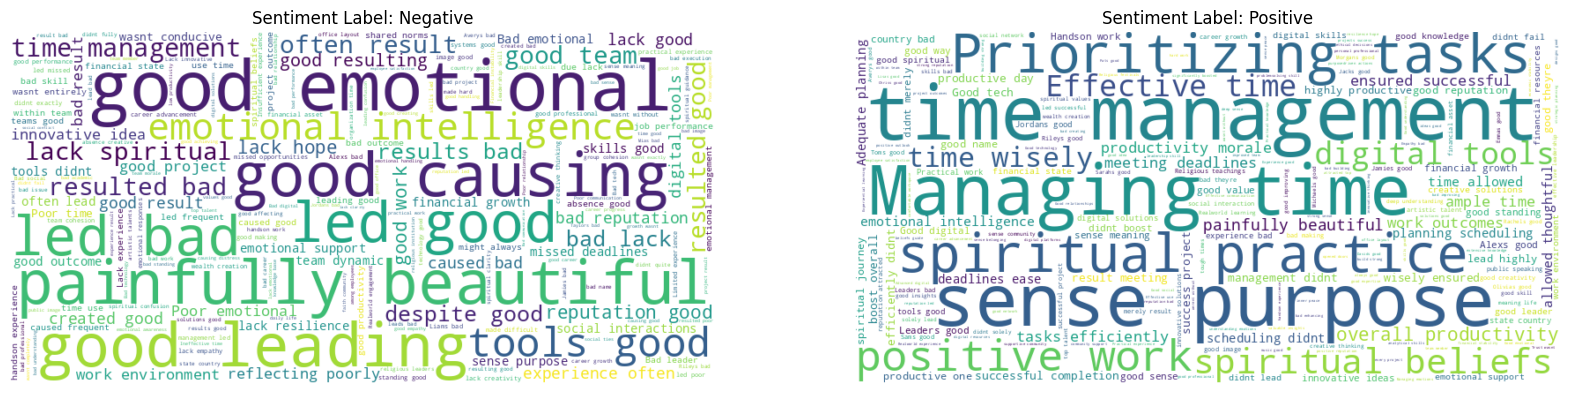

In [ ]:
from wordcloud import WordCloud

sentiments = df['Sentiment Label'].unique()
plt.figure(figsize=(20, 10))
for i, sentiment in enumerate(sentiments):
    plt.subplot(1, len(sentiments), i+1)
    text = ' '.join(df[df['Sentiment Label'] == sentiment]['Text_without_stopwords'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Sentiment Label: {sentiment}')
plt.show()


In [ ]:
df['Sentiment Label'].value_counts()

,count
Sentiment Label,
Positive,174735
Negative,161294


In [ ]:
df['text_length'] = df['Text_without_stopwords'].apply(len)


In [ ]:
df['text_length']

,text_length
0,21
1,48
2,20
3,46
4,37
...,...
336024,39
336025,44
336026,45
336027,64


# Count the occurrences of each capital

In [ ]:
capital_counts = df['Predicted Capital'].value_counts()
capital_counts

,count
Predicted Capital,
Economic Capital,22600
Social Capital,22400
Emotional Capital,22200
Digital Capital,21600
Cultural Capital,21400
Creative Capital,21200
Temporal Capital,21050
Physical Capital,21000
Intellectual Capital,20800


# Identify the most and least used capitals

In [ ]:
most_used = capital_counts.idxmax()
least_used = capital_counts.idxmin()

In [ ]:
most_used

'Economic Capital'

In [ ]:
least_used

'Spiritual Capital'

In [ ]:
df_filtered = df[df['Predicted Capital'].isin([most_used, least_used])]

In [ ]:
df_filtered

,Capitals Text Generation,Sentiment Label,Predicted Capital,User-Id,Social-Accounts,Date,Time,Day,Country,Age-Of-User,Clean_Capitals Text Generation,Tokens,Normalized_text,Text_without_stopwords,text_length
0,"💸 Financial growth is not good,",Negative,Economic Capital,3208,LinkedIn,2024-03-24,08:39:41,Sunday,Germany,23,Financial growth is not good,"[Financial, growth, is, not, good]",financial growth is not good,Financial growth good,21
7,🚀 Generating steady income promotes economic g...,Positive,Economic Capital,2089,QQ,2024-06-02,08:39:40,Sunday,Pakistan,32,Generating steady income promotes economic growth,"[Generating, steady, income, promotes, economi...",generating steady income promotes economic growth,Generating steady income promotes economic growth,49
10,💹 Wise investment choices can lead to a strong...,Positive,Economic Capital,5400,WeChat,2023-11-09,08:39:40,Thursday,Nigeria,22,Wise investment choices can lead to a stronger...,"[Wise, investment, choices, can, lead, to, a, ...",wise investment choices can lead to a stronger...,Wise investment choices lead stronger financia...,58
15,😟 Negative outlook hampered growth.,Negative,Economic Capital,5427,Discord,2024-02-29,08:39:41,Thursday,Germany,30,Negative outlook hampered growth,"[Negative, outlook, hampered, growth]",negative outlook hampered growth,Negative outlook hampered growth,32
30,😞 Taylor’s spiritual doubts caused difficultie...,Negative,Spiritual Capital,1813,Facebook,2023-12-04,08:39:39,Monday,Pakistan,46,Taylors spiritual doubts caused difficulties w...,"[Taylors, spiritual, doubts, caused, difficult...",taylors spiritual doubts caused difficulties w...,Taylors spiritual doubts caused difficulties v...,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335989,🌟 Avery’s strong values are not bad; they crea...,Positive,Spiritual Capital,7954,Tumblr,2024-04-19,08:39:39,Friday,Pakistan,38,Averys strong values are not bad they create a...,"[Averys, strong, values, are, not, bad, they, ...",averys strong values are not bad they create a...,Averys strong values bad create positive uplif...,62
335993,😕 Alex’s bad confusion about values is causing...,Negative,Spiritual Capital,4626,Flickr,2023-09-09,08:39:40,Saturday,Pakistan,49,Alexs bad confusion about values is causing hi...,"[Alexs, bad, confusion, about, values, is, cau...",alexs bad confusion about values is causing hi...,Alexs bad confusion values causing stress,41
336016,💫 Quinn’s sense of meaning is not bad; it brin...,Positive,Spiritual Capital,8805,Instagram,2023-09-23,08:39:39,Saturday,India,46,Quinns sense of meaning is not bad it brings j...,"[Quinns, sense, of, meaning, is, not, bad, it,...",quinns sense of meaning is not bad it brings j...,Quinns sense meaning bad brings joy around,42
336021,🙏 Aiden’s sense of purpose leads to meaningful...,Positive,Spiritual Capital,1630,LinkedIn,2024-08-30,08:39:39,Friday,Afghanistan,47,Aidens sense of purpose leads to meaningful co...,"[Aidens, sense, of, purpose, leads, to, meanin...",aidens sense of purpose leads to meaningful co...,Aidens sense purpose leads meaningful contribu...,51


In [ ]:
capital_counts = df_filtered['Predicted Capital'].value_counts()

In [ ]:
capital_counts

,count
Predicted Capital,
Economic Capital,22600
Spiritual Capital,20000


# The most and least used capitals

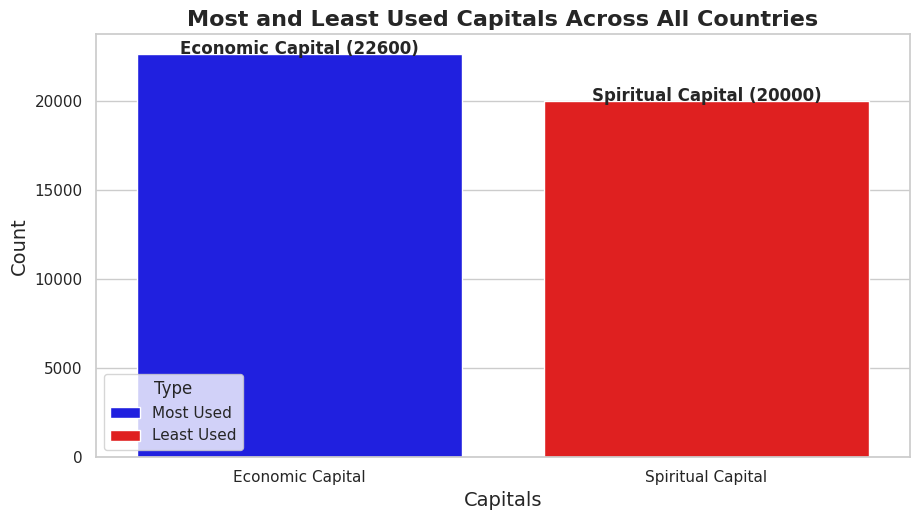

In [ ]:
# Count the frequency of each capital across all entries
capital_counts = df['Predicted Capital'].value_counts()

# Determine the most and least used capitals
most_used = capital_counts.idxmax()
least_used = capital_counts.idxmin()

# Get the counts of the most and least used capitals
most_used_count = capital_counts.max()
least_used_count = capital_counts.min()

# Prepare the data for plotting
plot_data = pd.DataFrame({
    'Capital': [most_used, least_used],
    'Count': [most_used_count, least_used_count],
    'Type': ['Most Used', 'Least Used']
})

# Set up the color palette for the most and least used capitals
palette = {'Most Used': 'blue', 'Least Used': 'red'}

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plotting the most and least used capitals
barplot = sns.barplot(
    data=plot_data,
    x='Capital',
    y='Count',
    hue='Type',
    palette=palette,
    dodge=False
)

# Add titles and labels
plt.title('Most and Least Used Capitals Across All Countries', fontsize=16, weight='bold')
plt.xlabel('Capitals', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display values on top of each bar
for i, (capital, count) in enumerate(zip(plot_data['Capital'], plot_data['Count'])):
    plt.text(i, count + 1, f'{capital} ({count})', ha='center', fontsize=12, weight='bold')

# Customize the background color
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Adjust layout and margins
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()

# Most Used Capital by Country (Percentage)

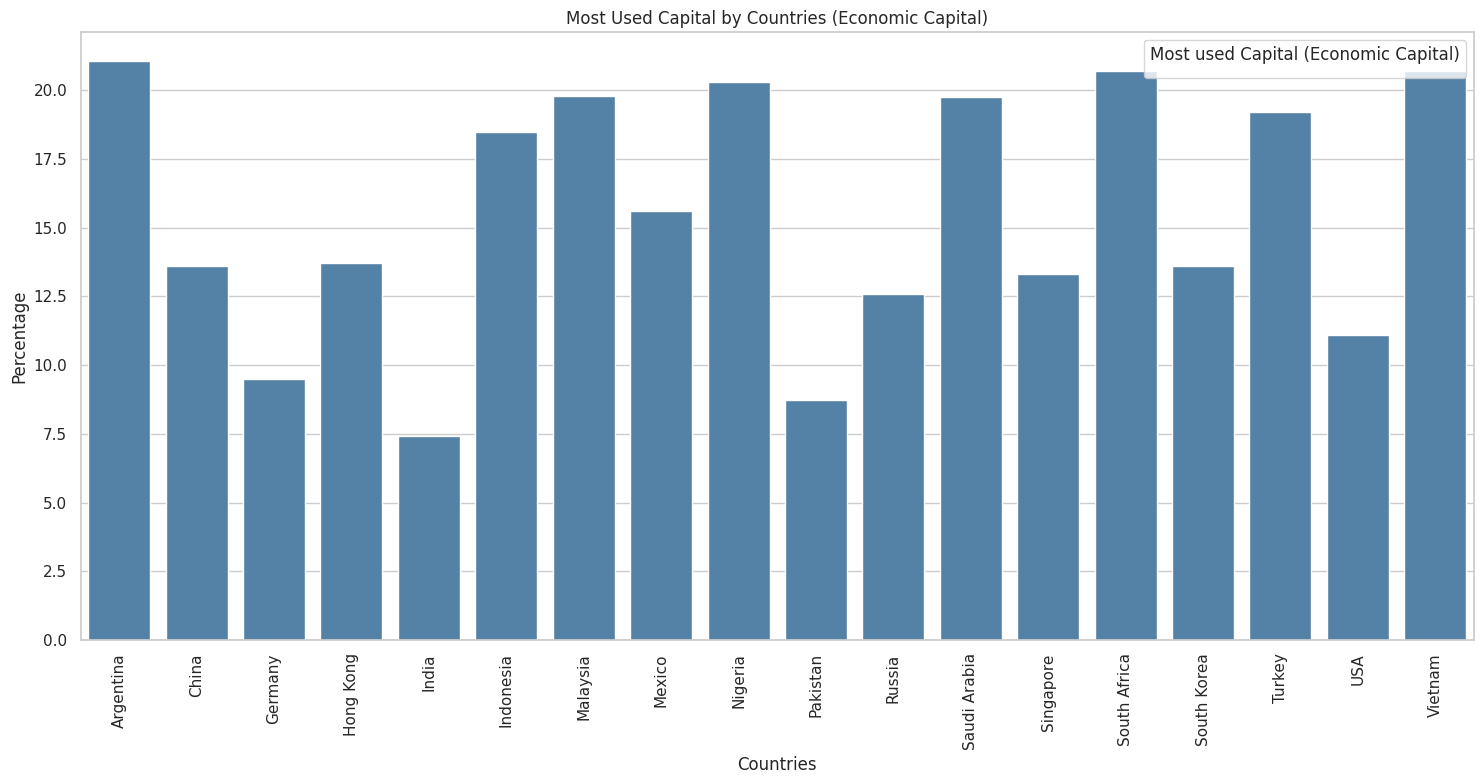

In [ ]:
# Calculate the total count of 'Economic Capital' per country
economic_capital_counts = df[df['Predicted Capital'] == 'Economic Capital'].groupby('Country').size()

# Calculate the total count of all capitals per country
total_counts_per_country = df.groupby('Country').size()

# Calculate the percentage of 'Economic Capital' for each country
percentage_economic_capital = (economic_capital_counts / total_counts_per_country) * 100

# Filter out countries with 0% utilization
percentage_df = percentage_economic_capital.reset_index(name='Percentage of Economic Capital')
percentage_df.columns = ['Country', 'Percentage of Economic Capital']
percentage_df = percentage_df[percentage_df['Percentage of Economic Capital'] > 0]

# Plotting
plt.figure(figsize=(15, 8))
# Use a single color for all bars
sns.barplot(x='Country', y='Percentage of Economic Capital', data=percentage_df, color='steelblue')

# Customize plot
plt.xticks(rotation=90)
plt.title('Most Used Capital by Countries (Economic Capital)')
plt.xlabel('Countries')
plt.ylabel('Percentage')
plt.legend([], [], title='Most used Capital (Economic Capital)', loc='upper right')  # Remove legend

plt.tight_layout()
plt.show()

# Most and Least Used Capitals in Each Country

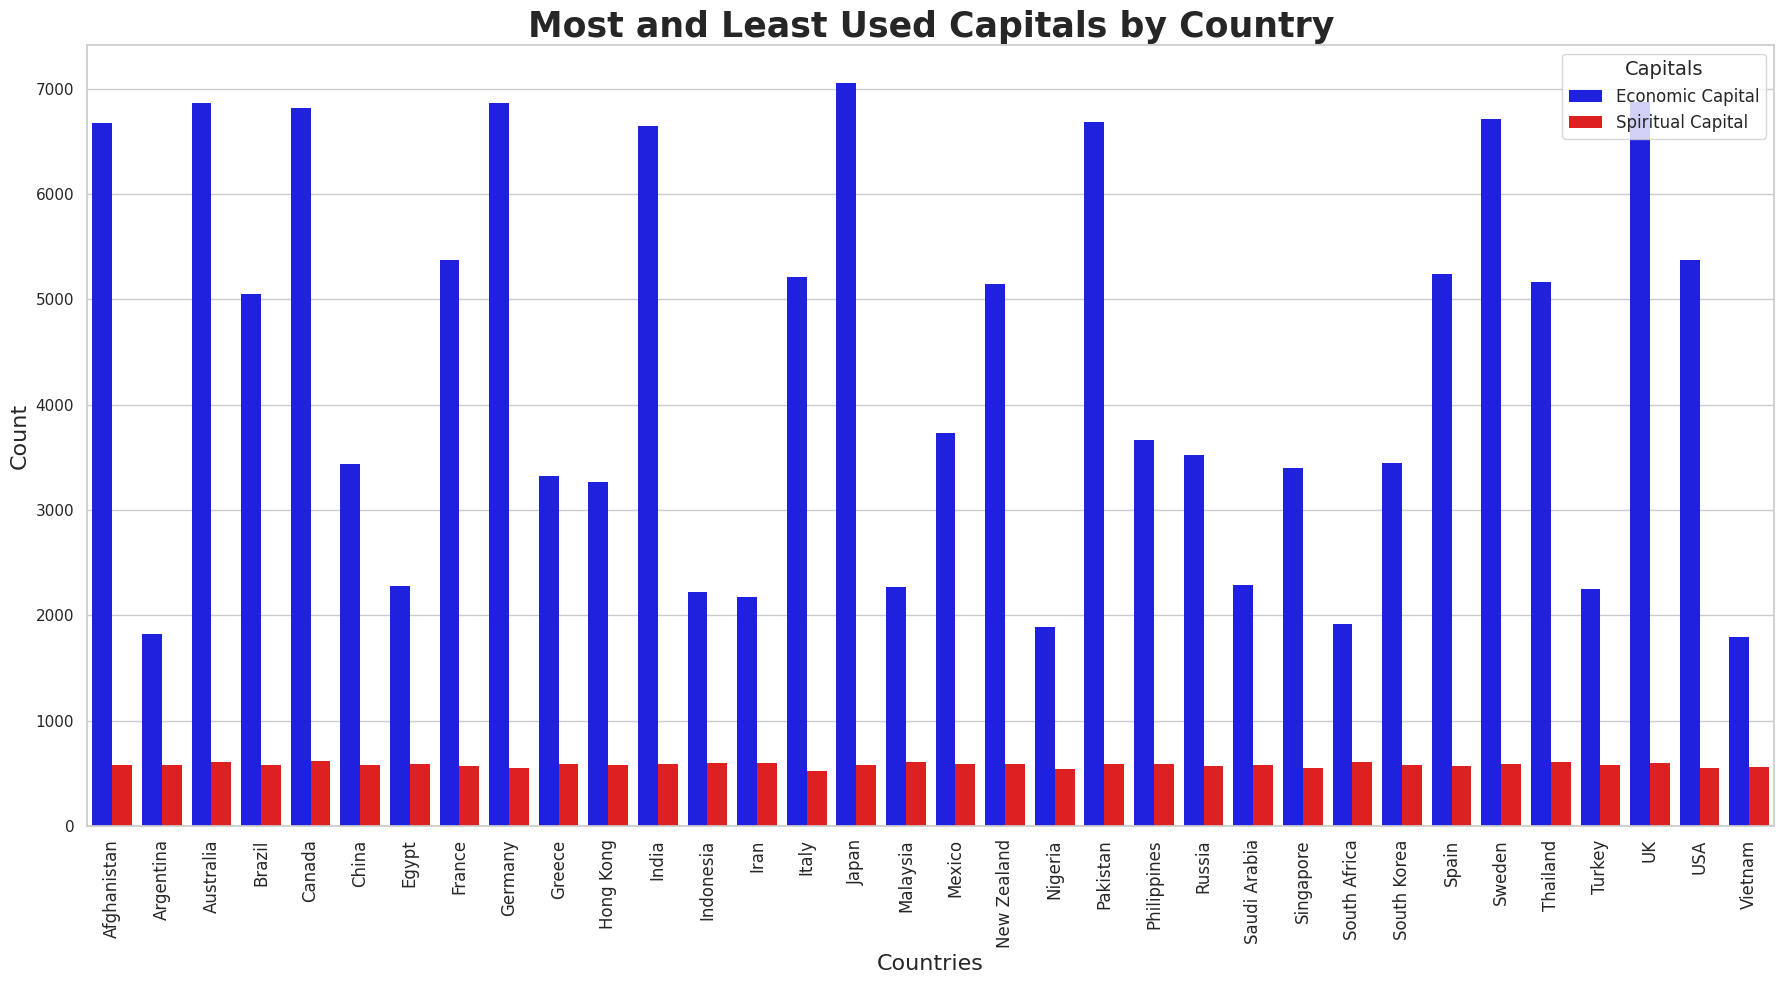

In [ ]:
# Group the data by Country and Predicted Capital, count occurrences
capital_usage = df.groupby(['Country', 'Predicted Capital']).size().reset_index(name='Count')

# Get the most and least used capitals for each country
most_used = capital_usage.loc[capital_usage.groupby('Country')['Count'].idxmax()]
least_used = capital_usage.loc[capital_usage.groupby('Country')['Count'].idxmin()]

# Set 'Usage Type' to actual capital names
most_used['Usage Type'] = 'Economic Capital'
least_used['Usage Type'] = 'Spiritual Capital'

# Combine most and least used into one dataframe
combined_usage = pd.concat([most_used, least_used])

# Set up the color palette for the actual capital names
palette = {'Economic Capital': 'blue', 'Spiritual Capital': 'red'}

# Create a bar plot (Country on x-axis, Count on y-axis)
plt.figure(figsize=(18, 10))
sns.set(style="whitegrid")
barplot = sns.barplot(x='Country', y='Count', hue='Usage Type', data=combined_usage, palette=palette)

# Add titles and labels
plt.title('Most and Least Used Capitals by Country', fontsize=25, weight='bold')
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, ha='center', fontsize=12)

# Remove numbers above bars
for p in barplot.patches:
    p.set_edgecolor('none')

# Customize the legend to show actual capital names
plt.legend(title="Capitals", title_fontsize='14', fontsize='12')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# Highest and Lowest Used Capitals by Each Country (Percentage) - Top 10 Countries

<ipython-input-43-721463927>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_lowest_by_country = capital_counts_by_country.groupby('Country').apply(


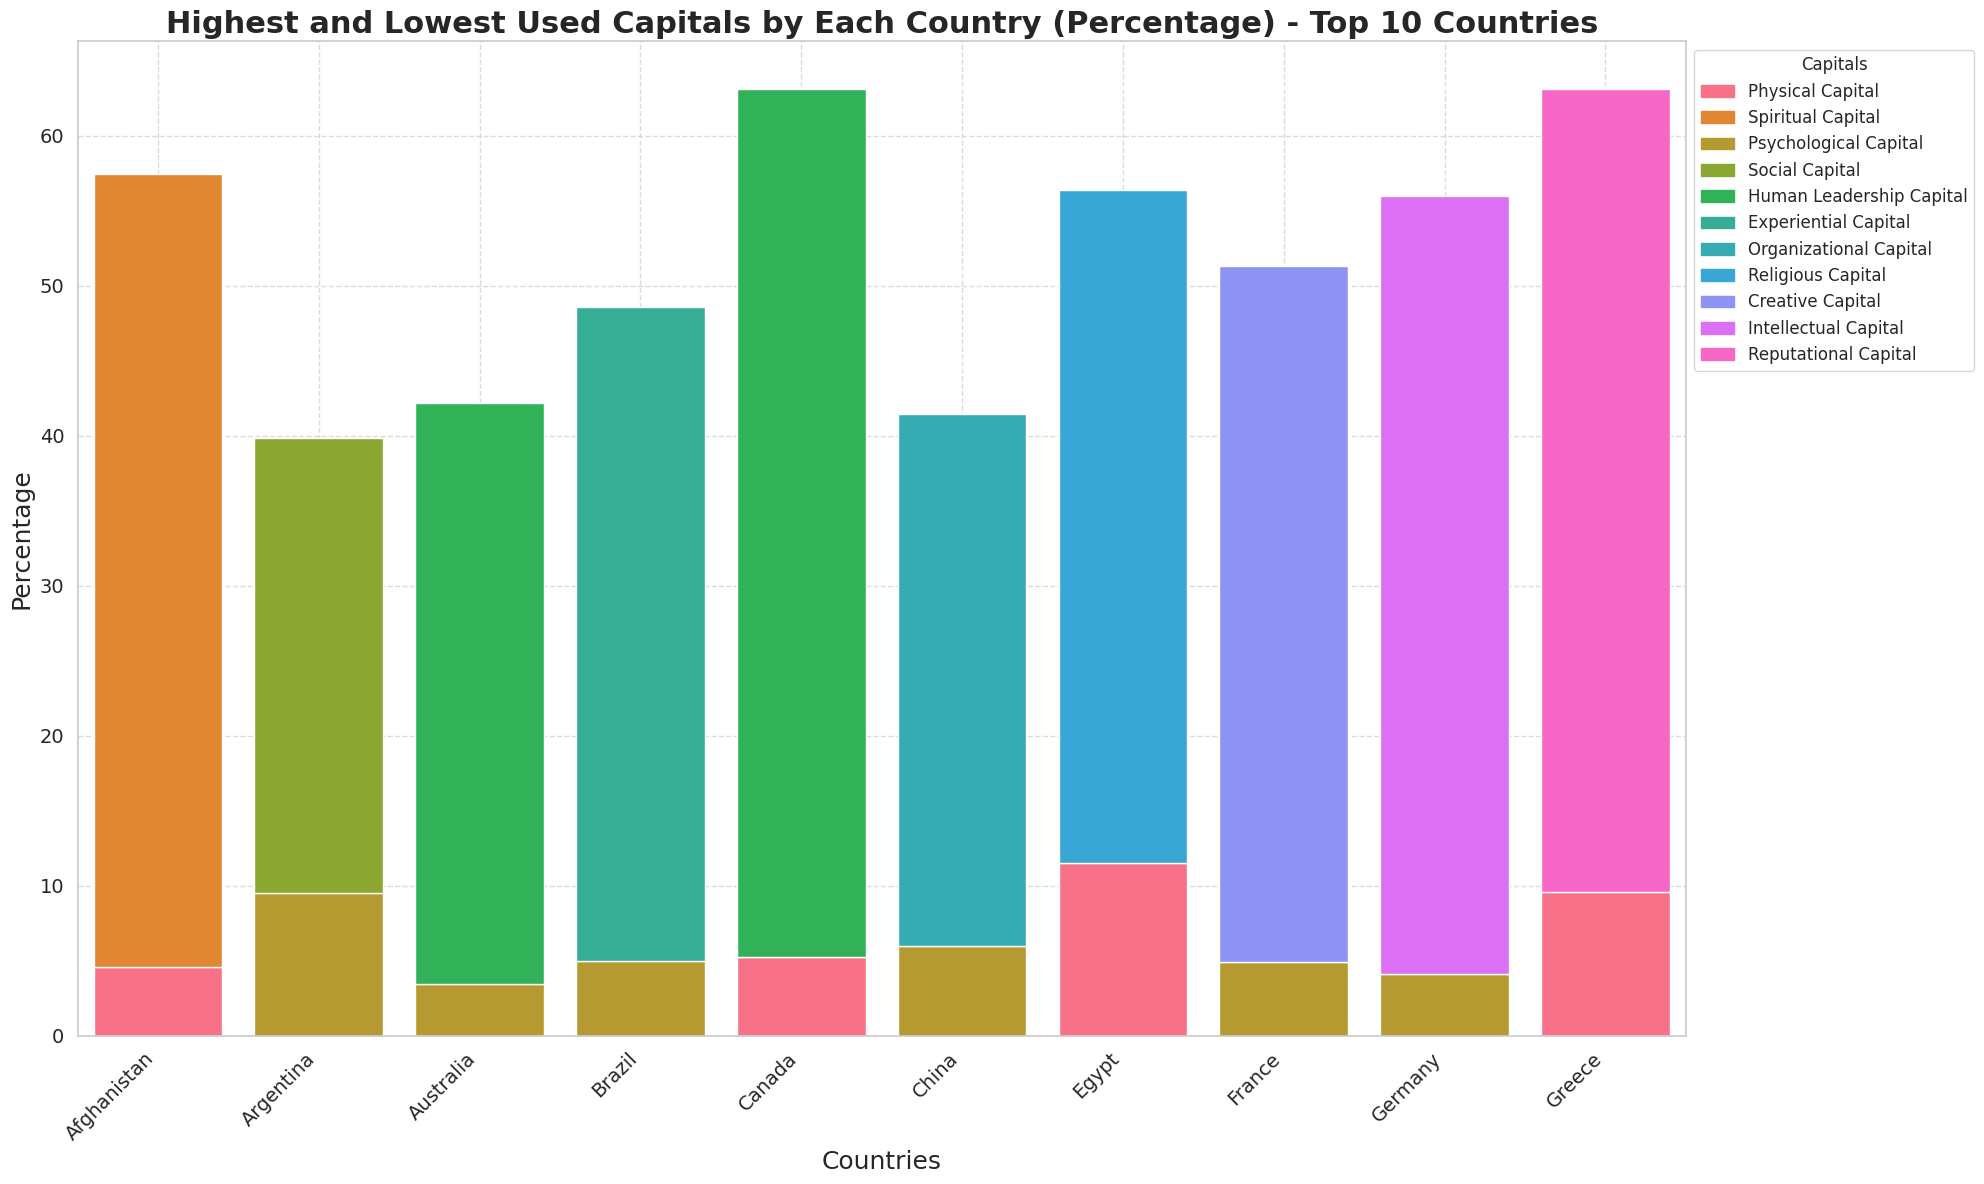

In [ ]:
# Step 1: Calculate capital usage by country and capital
capital_counts_by_country = df.groupby(['Country', 'Predicted Capital']).size().reset_index(name='Count')

# Step 2: Calculate percentage of each capital's usage within each country
total_counts_by_country = capital_counts_by_country.groupby('Country')['Count'].transform('sum')
capital_counts_by_country['Percentage'] = (capital_counts_by_country['Count'] / total_counts_by_country) * 100

# Step 3: Find the highest and lowest used capital for each country
highest_lowest_by_country = capital_counts_by_country.groupby('Country').apply(
    lambda x: pd.concat([x.nsmallest(1, 'Percentage'), x.nlargest(1, 'Percentage')])
).reset_index(drop=True)

# Step 4: Select only the first 10 countries for visualization
selected_countries = highest_lowest_by_country['Country'].unique()[:10]  # Select the first 10 unique countries
filtered_data = highest_lowest_by_country[highest_lowest_by_country['Country'].isin(selected_countries)]

# Step 5: Generate a distinct color palette based on unique predicted capitals
unique_capitals = filtered_data['Predicted Capital'].unique()
distinct_palette = sns.color_palette("husl", n_colors=len(unique_capitals))  # Using high-contrast husl colors
color_map = dict(zip(unique_capitals, distinct_palette))  # Map each capital to a distinct color

# Step 6: Sort data by country to maintain order
country_order = filtered_data['Country'].unique()

# Step 7: Prepare data for stacked bar plotting
lowest_by_country = filtered_data.groupby('Country').first().reset_index()  # Lowest capital by country
highest_by_country = filtered_data.groupby('Country').last().reset_index()  # Highest capital by country

# Step 8: Plot the stacked bars
plt.figure(figsize=(20, 12))

bar_width = 0.8  # Reduce bar width for more space between bars
countries = lowest_by_country['Country']
lowest_values = lowest_by_country['Percentage']
highest_values = highest_by_country['Percentage']

# Plot the lowest capital usage
bars1 = plt.bar(
    countries,
    lowest_values,
    color=[color_map[capital] for capital in lowest_by_country['Predicted Capital']],
    width=bar_width,
    label='Lowest Capital'
)

# Plot the highest capital usage on top of the lowest
bars2 = plt.bar(
    countries,
    highest_values,
    bottom=lowest_values,
    color=[color_map[capital] for capital in highest_by_country['Predicted Capital']],
    width=bar_width,
    label='Highest Capital'
)

# Create a custom legend to display capital names with their colors
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[capital]) for capital in unique_capitals]
labels = unique_capitals

# Add the custom legend with the actual capital names
plt.legend(handles, labels, title='Capitals', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# Set the y-axis to start at 0 and limit the upper range to automatically adjust
plt.ylim(0, None)

# Add gridlines and adjust aesthetics
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Highest and Lowest Used Capitals by Each Country (Percentage) - Top 10 Countries', fontsize=22, fontweight='bold')
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add space between the bars by adjusting the x-axis limits
plt.xlim(-0.5, len(countries) - 0.5)

plt.tight_layout()
plt.show()


# Highest and Lowest Used Capitals by each Country (Percentage)

<ipython-input-44-3842694005>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_lowest_by_country = capital_counts_by_country.groupby('Country').apply(


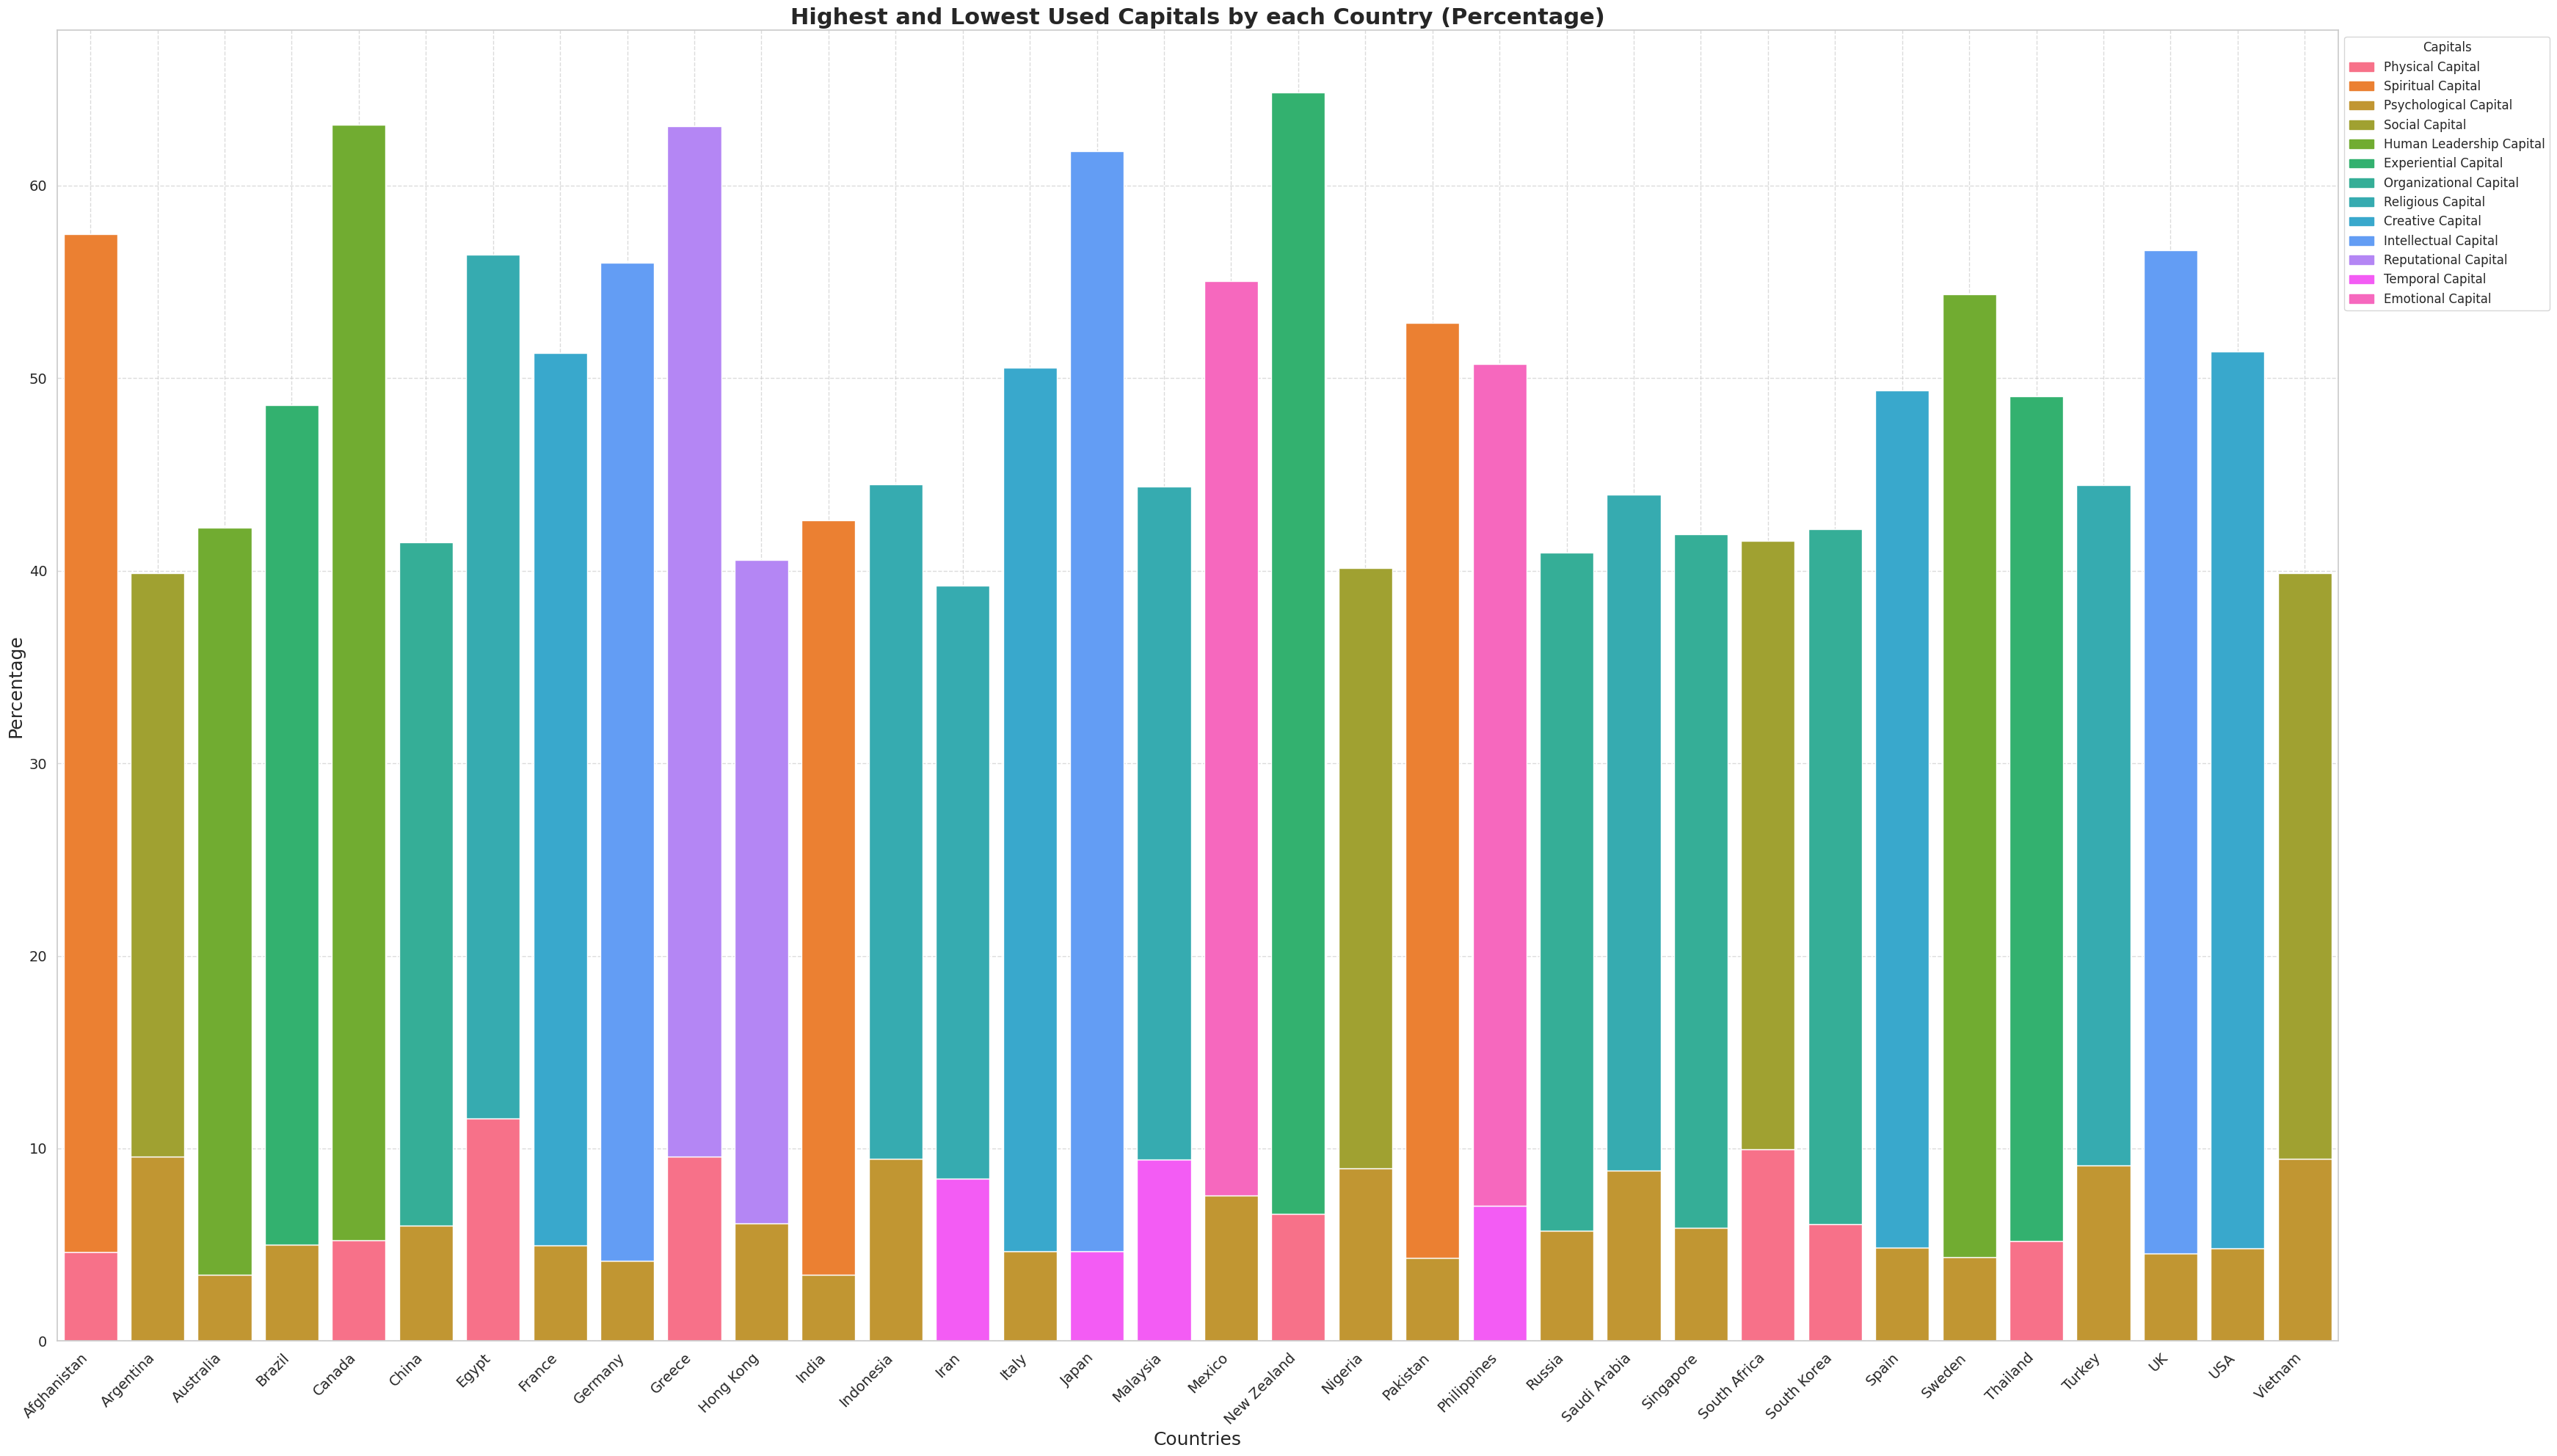

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Calculate capital usage by country and capital
capital_counts_by_country = df.groupby(['Country', 'Predicted Capital']).size().reset_index(name='Count')

# Step 2: Calculate percentage of each capital's usage within each country
total_counts_by_country = capital_counts_by_country.groupby('Country')['Count'].transform('sum')
capital_counts_by_country['Percentage'] = (capital_counts_by_country['Count'] / total_counts_by_country) * 100

# Step 3: Find the highest and lowest used capital for each country
highest_lowest_by_country = capital_counts_by_country.groupby('Country').apply(
    lambda x: pd.concat([x.nsmallest(1, 'Percentage'), x.nlargest(1, 'Percentage')])
).reset_index(drop=True)

# Step 4: Generate a distinct color palette based on unique predicted capitals
unique_capitals = highest_lowest_by_country['Predicted Capital'].unique()

# Use a distinct color palette like 'husl' or 'tab20' for clear differentiation
distinct_palette = sns.color_palette("husl", n_colors=len(unique_capitals))  # Using high-contrast husl colors
color_map = dict(zip(unique_capitals, distinct_palette))  # Map each capital to a distinct color

# Step 5: Sort data by country to maintain order
country_order = highest_lowest_by_country['Country'].unique()

# Step 6: Prepare data for stacked bar plotting
lowest_by_country = highest_lowest_by_country.groupby('Country').first().reset_index()  # Lowest capital by country
highest_by_country = highest_lowest_by_country.groupby('Country').last().reset_index()  # Highest capital by country

# Step 7: Plot the stacked bars
plt.figure(figsize=(35, 20))

bar_width = 0.8 # Reduce bar width for more space between bars
countries = lowest_by_country['Country']
lowest_values = lowest_by_country['Percentage']
highest_values = highest_by_country['Percentage']

# Plot the lowest capital usage
bars1 = plt.bar(
    countries,
    lowest_values,
    color=[color_map[capital] for capital in lowest_by_country['Predicted Capital']],
    width=bar_width,
    label='Lowest Capital'
)

# Plot the highest capital usage on top of the lowest
bars2 = plt.bar(
    countries,
    highest_values,
    bottom=lowest_values,
    color=[color_map[capital] for capital in highest_by_country['Predicted Capital']],
    width=bar_width,
    label='Highest Capital'
)

# Create a custom legend to display capital names with their colors
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[capital]) for capital in unique_capitals]
labels = unique_capitals

# Add the custom legend with the actual capital names
plt.legend(handles, labels, title='Capitals', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# Set the y-axis to start at 0 and limit the upper range to automatically adjust
plt.ylim(0, None)

# Add gridlines and adjust aesthetics
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Highest and Lowest Used Capitals by each Country (Percentage)', fontsize=22, fontweight='bold')
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add space between the bars by adjusting the x-axis limits
plt.xlim(-0.5, len(countries) - 0.5)

plt.tight_layout()
plt.show()


# Highest and Lowest Used Capitals by Continent (Percentage)

<ipython-input-45-1620509442>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_lowest_by_country = capital_counts_by_country.groupby('Country').apply(
<ipython-input-45-1620509442>:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_lowest_by_continent = highest_lowest_by_continent.groupby('Continent').apply(


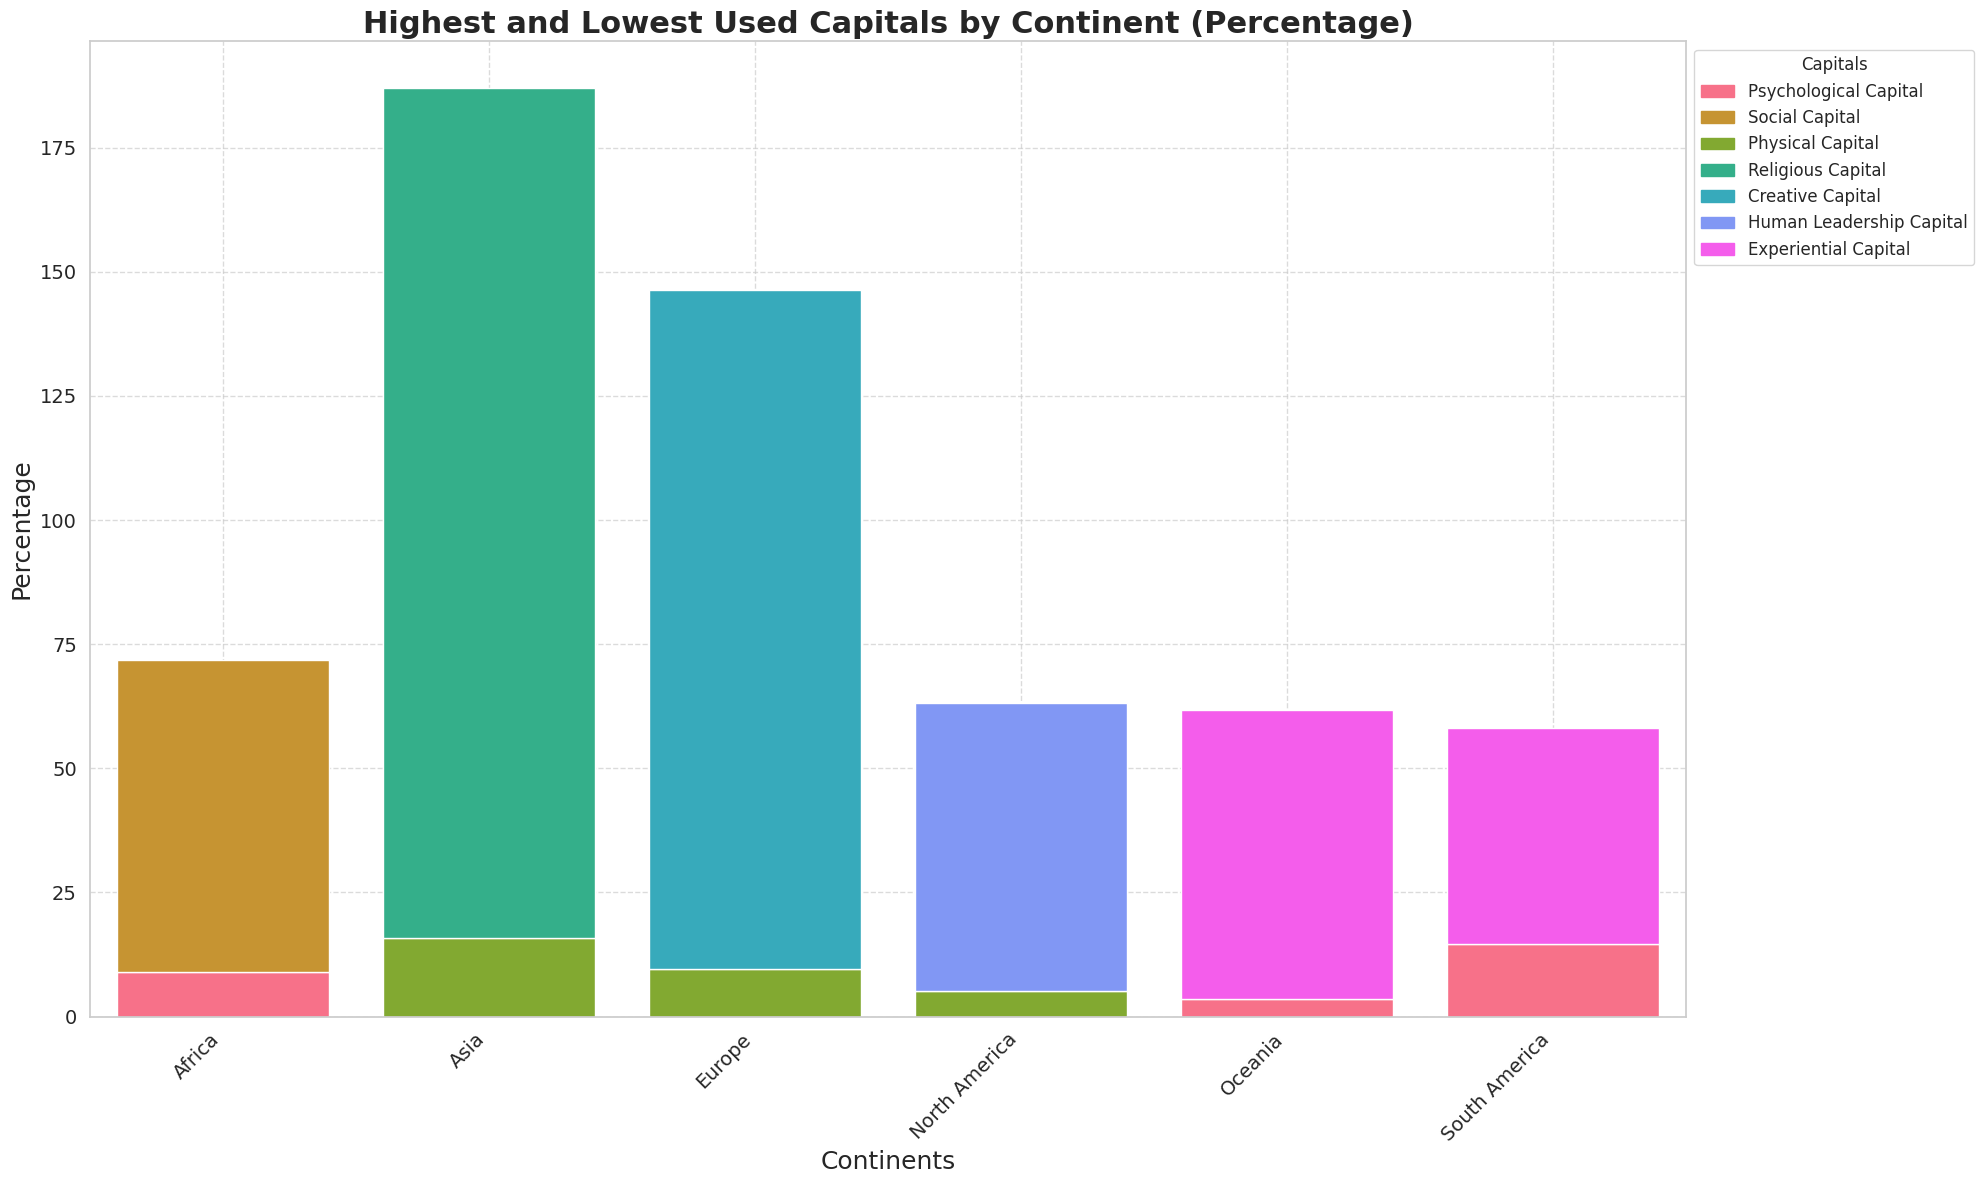

In [ ]:
# Updated continent mapping for 34 countries
continent_mapping = {
    'Australia': 'Oceania', 'India': 'Asia', 'Pakistan': 'Asia', 'Sweden': 'Europe',
    'Germany': 'Europe', 'UK': 'Europe', 'Afghanistan': 'Asia', 'Japan': 'Asia',
    'Canada': 'North America', 'Spain': 'Europe', 'Thailand': 'Asia', 'Brazil': 'South America',
    'France': 'Europe', 'USA': 'North America', 'Italy': 'Europe', 'Russia': 'Europe',
    'China': 'Asia', 'South Korea': 'Asia', 'Hong Kong': 'Asia', 'Singapore': 'Asia',
    'New Zealand': 'Oceania', 'Philippines': 'Asia', 'Mexico': 'North America',
    'Iran': 'Asia', 'Saudi Arabia': 'Asia', 'Malaysia': 'Asia', 'Turkey': 'Asia',
    'Indonesia': 'Asia', 'Greece': 'Europe', 'Nigeria': 'Africa', 'South Africa': 'Africa',
    'Argentina': 'South America', 'Vietnam': 'Asia', 'Egypt': 'Africa'
}

# Step 1: Calculate capital usage by country and capital
capital_counts_by_country = df.groupby(['Country', 'Predicted Capital']).size().reset_index(name='Count')

# Step 2: Map countries to continents
capital_counts_by_country['Continent'] = capital_counts_by_country['Country'].map(continent_mapping)

# Step 3: Calculate percentage of each capital's usage within each country
total_counts_by_country = capital_counts_by_country.groupby('Country')['Count'].transform('sum')
capital_counts_by_country['Percentage'] = (capital_counts_by_country['Count'] / total_counts_by_country) * 100

# Step 4: Find the highest and lowest used capital for each country
highest_lowest_by_country = capital_counts_by_country.groupby('Country').apply(
    lambda x: pd.concat([x.nsmallest(1, 'Percentage'), x.nlargest(1, 'Percentage')])
).reset_index(drop=True)

# Step 5: Aggregate the data by continent
highest_lowest_by_country['Continent'] = highest_lowest_by_country['Country'].map(continent_mapping)
highest_lowest_by_continent = highest_lowest_by_country.groupby(['Continent', 'Predicted Capital']).agg(
    {'Percentage': 'sum'}).reset_index()

# Step 6: Find the highest and lowest used capital for each continent
highest_lowest_by_continent = highest_lowest_by_continent.groupby('Continent').apply(
    lambda x: pd.concat([x.nsmallest(1, 'Percentage'), x.nlargest(1, 'Percentage')])
).reset_index(drop=True)

# Step 7: Generate a distinct color palette based on unique predicted capitals
unique_capitals = highest_lowest_by_continent['Predicted Capital'].unique()
distinct_palette = sns.color_palette("husl", n_colors=len(unique_capitals))  # Using high-contrast husl colors
color_map = dict(zip(unique_capitals, distinct_palette))  # Map each capital to a distinct color

# Step 8: Prepare data for stacked bar plotting
lowest_by_continent = highest_lowest_by_continent.groupby('Continent').first().reset_index()  # Lowest capital by continent
highest_by_continent = highest_lowest_by_continent.groupby('Continent').last().reset_index()  # Highest capital by continent

# Step 9: Plot the stacked bars
plt.figure(figsize=(20, 12))

bar_width = 0.8  # Reduce bar width for more space between bars
continents = lowest_by_continent['Continent']
lowest_values = lowest_by_continent['Percentage']
highest_values = highest_by_continent['Percentage']

# Plot the lowest capital usage
bars1 = plt.bar(
    continents,
    lowest_values,
    color=[color_map[capital] for capital in lowest_by_continent['Predicted Capital']],
    width=bar_width,
    label='Lowest Capital'
)

# Plot the highest capital usage on top of the lowest
bars2 = plt.bar(
    continents,
    highest_values,
    bottom=lowest_values,
    color=[color_map[capital] for capital in highest_by_continent['Predicted Capital']],
    width=bar_width,
    label='Highest Capital'
)

# Create a custom legend to display capital names with their colors
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[capital]) for capital in unique_capitals]
labels = unique_capitals

# Add the custom legend with the actual capital names
plt.legend(handles, labels, title='Capitals', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# Set the y-axis to start at 0 and limit the upper range to automatically adjust
plt.ylim(0, None)

# Add gridlines and adjust aesthetics
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Highest and Lowest Used Capitals by Continent (Percentage)', fontsize=22, fontweight='bold')
plt.xlabel('Continents', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add space between the bars by adjusting the x-axis limits
plt.xlim(-0.5, len(continents) - 0.5)

plt.tight_layout()
plt.show()


# Most and Least Used Capitals by Month (Percentage)

In [ ]:
print(least_used['Predicted Capital'].unique())
print(most_used['Predicted Capital'].unique())

['Physical Capital' 'Psychological Capital' 'Temporal Capital']
['Spiritual Capital' 'Social Capital' 'Human Leadership Capital'
 'Experiential Capital' 'Organizational Capital' 'Religious Capital'
 'Creative Capital' 'Intellectual Capital' 'Reputational Capital'
 'Emotional Capital']


<ipython-input-47-3655339072>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_used = capital_counts.loc[capital_counts.groupby('Month')['Percentage'].idxmax()]
<ipython-input-47-3655339072>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  least_used = capital_counts.loc[capital_counts.groupby('Month')['Percentage'].idxmin()]


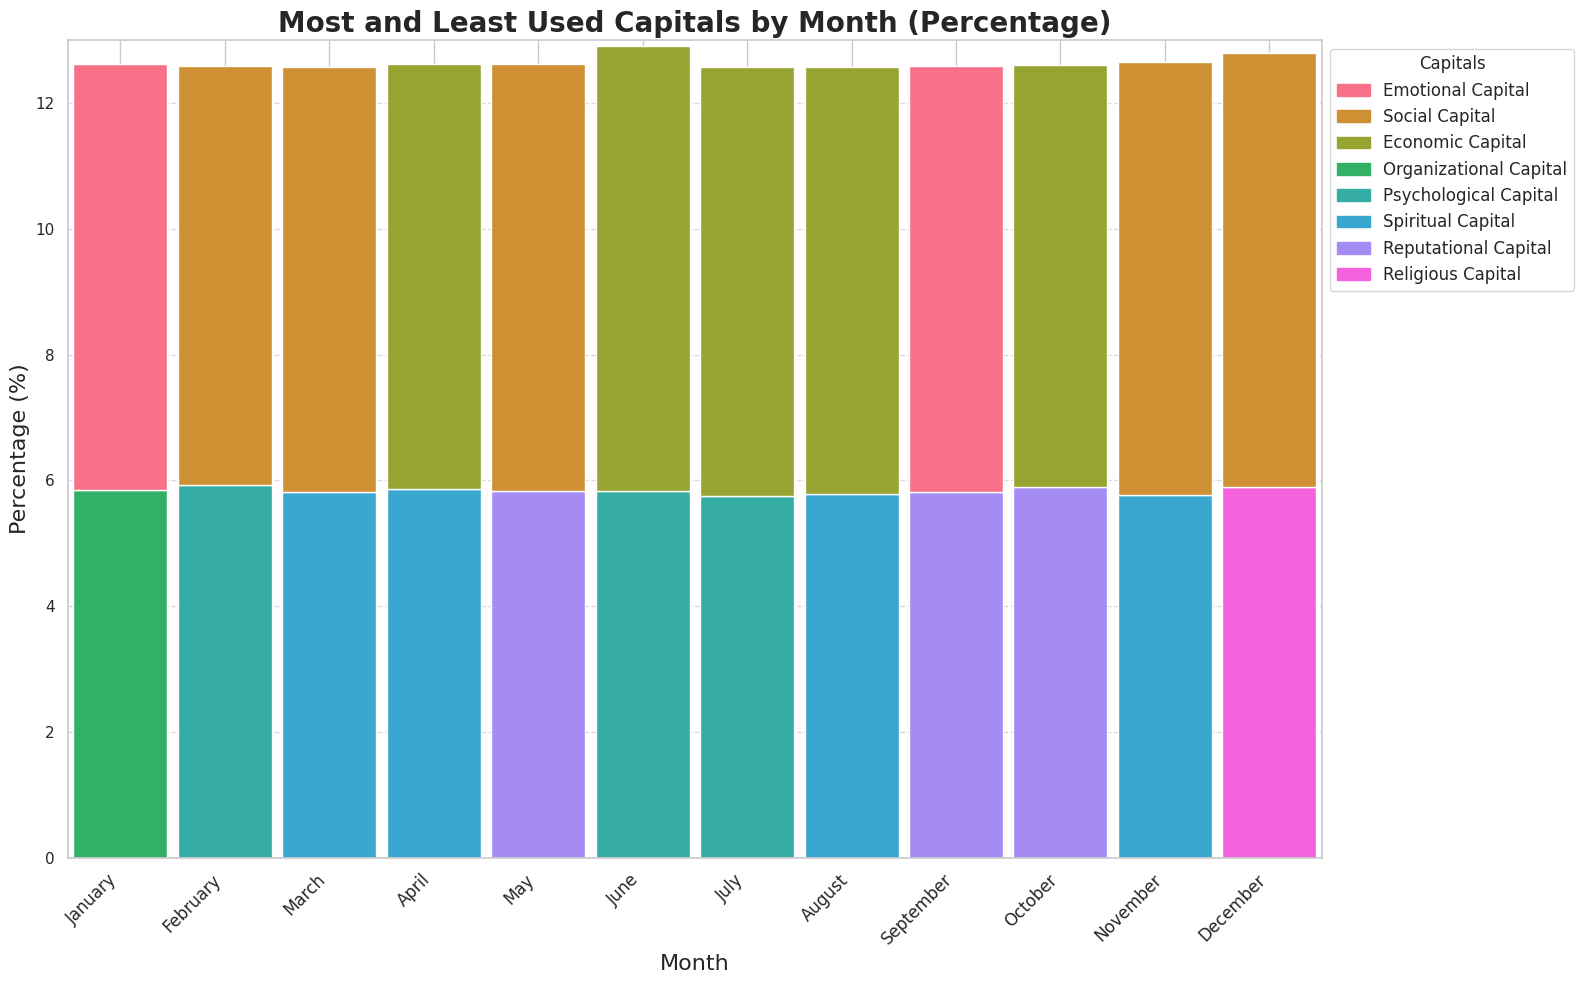

In [ ]:
# Step 1: Convert 'Date' column to datetime and extract the month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%B')

# Step 2: Define the correct chronological order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Step 3: Group by 'Month' and 'Predicted Capital' to get the counts of each capital used
capital_counts = df.groupby(['Month', 'Predicted Capital']).size().reset_index(name='Count')

# Step 4: Calculate the total count per month to get percentages
monthly_totals = capital_counts.groupby('Month')['Count'].sum().reset_index(name='Total')
capital_counts = pd.merge(capital_counts, monthly_totals, on='Month')
capital_counts['Percentage'] = (capital_counts['Count'] / capital_counts['Total']) * 100

# Step 5: Convert 'Month' to categorical to enforce the correct order
capital_counts['Month'] = pd.Categorical(capital_counts['Month'], categories=month_order, ordered=True)

# Step 6: Find the most and least used capitals per month
most_used = capital_counts.loc[capital_counts.groupby('Month')['Percentage'].idxmax()]
least_used = capital_counts.loc[capital_counts.groupby('Month')['Percentage'].idxmin()]

# Combine most and least used capitals into a single DataFrame
combined = pd.concat([most_used, least_used]).drop_duplicates(subset=['Month', 'Predicted Capital'])

# Step 7: Define an attractive color palette for the chart (using Seaborn's 'husl' palette)
unique_capitals = combined['Predicted Capital'].unique()
palette = sns.color_palette('husl', len(unique_capitals))  # Using a vibrant 'husl' palette
color_map = {capital: palette[i] for i, capital in enumerate(unique_capitals)}

# Step 8: Extract values for plotting
months = month_order  # Use the correct chronological order of months
least_values = least_used.set_index('Month').reindex(months)['Percentage'].values  # Percentages of least used capitals
most_values = most_used.set_index('Month').reindex(months)['Percentage'].values    # Percentages of most used capitals

# Step 9: Start plotting the stacked bars
plt.figure(figsize=(16, 10))

# Define positions for bars
bar_positions = range(len(months))
bar_width = 0.9  # Adjust bar width

# Plot the least used capitals at the bottom
bars1 = plt.bar(
    bar_positions,
    least_values,
    color=[color_map[capital] for capital in least_used.set_index('Month').reindex(months)['Predicted Capital']],
    width=bar_width,
    label='Least Used Capital'
)

# Plot the most used capitals on top of the least used ones
bars2 = plt.bar(
    bar_positions,
    most_values,
    bottom=least_values,  # Stacking on top of least values
    color=[color_map[capital] for capital in most_used.set_index('Month').reindex(months)['Predicted Capital']],
    width=bar_width,
    label='Most Used Capital'
)

# Step 10: Customize the plot's appearance
plt.xlim(-0.5, len(months) - 0.5)  # Ensures bars start close to the 0 index
plt.ylim(0, 13)  # Set y-axis limit from 0 to 100 since percentages are used
plt.xticks(bar_positions, months, rotation=45, ha='right', fontsize=12)
plt.title('Most and Least Used Capitals by Month (Percentage)', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=16)

# Step 11: Add custom legend with actual capital names
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[capital]) for capital in unique_capitals]
plt.legend(handles, unique_capitals, title='Capitals', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure layout fits into the figure area
plt.tight_layout()

# Display the plot
plt.show()


# Most and Least Used Capitals by Age of Users

<ipython-input-48-3136111069>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Predicted Capital', y='Age-Of-User', data=df, palette=palette)
<ipython-input-48-3136111069>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right', fontsize=12)
<ipython-input-48-3136111069>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_yticklabels(boxplot.get_yticks(), fontsize=12)


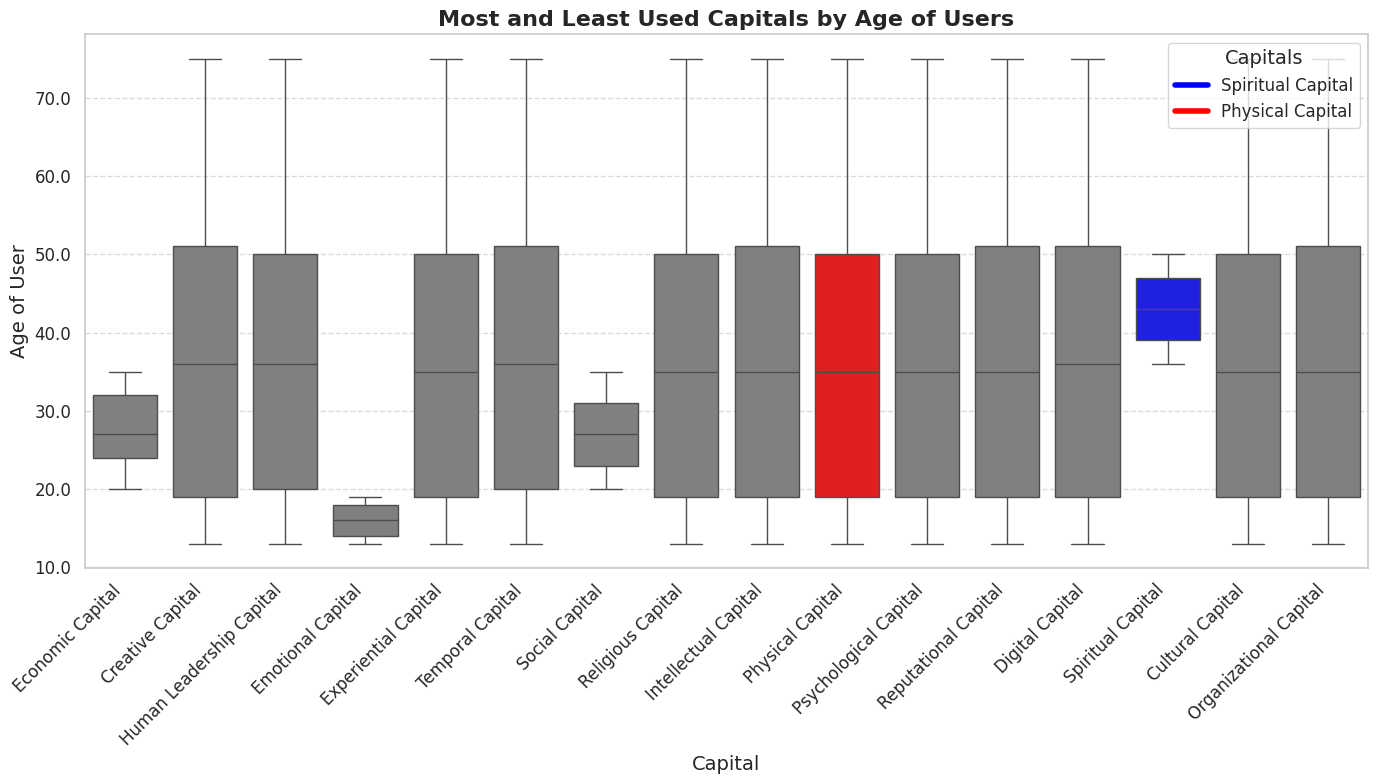

In [ ]:
# Group the data by Country and Predicted Capital, count occurrences
capital_usage = df.groupby(['Country', 'Predicted Capital']).size().reset_index(name='Count')

# Get the most and least used capitals for each country
most_used = capital_usage.loc[capital_usage.groupby('Country')['Count'].idxmax()]
least_used = capital_usage.loc[capital_usage.groupby('Country')['Count'].idxmin()]

# Extract the actual capital names for most and least used
economic_capital = most_used['Predicted Capital'].values[0]  # Most used capital
spiritual_capital = least_used['Predicted Capital'].values[0]  # Least used capital

# Create a color palette where most and least used capitals have specific colors
unique_capitals = df['Predicted Capital'].unique()
palette = {capital: 'grey' for capital in unique_capitals}
palette[economic_capital] = 'blue'
palette[spiritual_capital] = 'red'

plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a box plot with custom color mapping
boxplot = sns.boxplot(x='Predicted Capital', y='Age-Of-User', data=df, palette=palette)

# Add titles and labels
plt.title('Most and Least Used Capitals by Age of Users', fontsize=16, weight='bold')
plt.xlabel('Capital', fontsize=14)
plt.ylabel('Age of User', fontsize=14)

# Customize the x-axis and y-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right', fontsize=12)
boxplot.set_yticklabels(boxplot.get_yticks(), fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the background color
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Add custom legend
handles = [plt.Line2D([0], [0], color='blue', lw=4, label=economic_capital),
           plt.Line2D([0], [0], color='red', lw=4, label=spiritual_capital)]
plt.legend(title="Capitals", handles=handles, title_fontsize='14', fontsize='12', loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# Age Distribution of Users for the Most and Least Used Capitals

<ipython-input-49-1241847572>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'Capital Type'] = filtered_df['Predicted Capital'].map(capital_map)
<ipython-input-49-1241847572>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x='Age-Of-User', y='Capital Type', data=filtered_df, palette=palette)


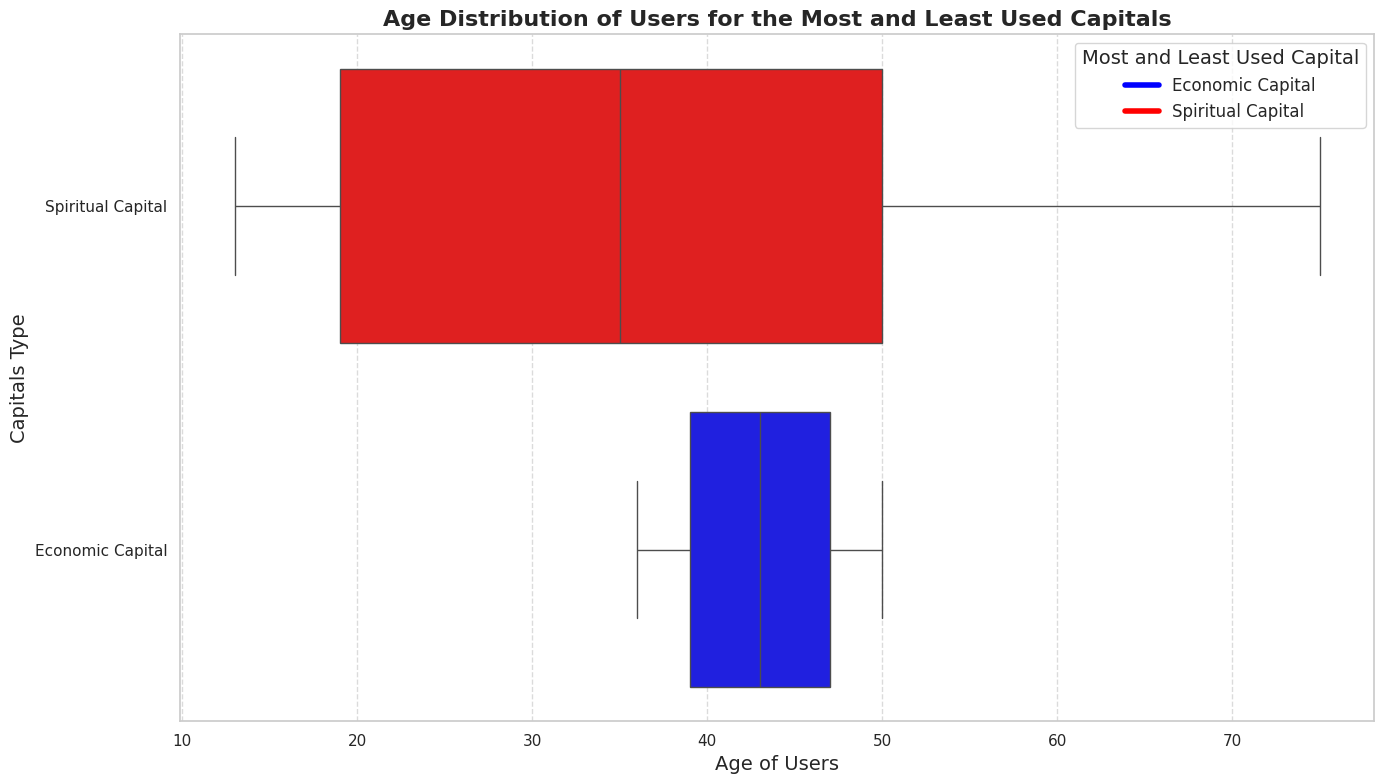

In [ ]:
# Group the data by Country and Predicted Capital, count occurrences
capital_usage = df.groupby(['Country', 'Predicted Capital']).size().reset_index(name='Count')

# Get the most and least used capitals for each country
most_used = capital_usage.loc[capital_usage.groupby('Country')['Count'].idxmax()]
least_used = capital_usage.loc[capital_usage.groupby('Country')['Count'].idxmin()]

# Extract the actual capital names for most and least used
economic_capital = most_used['Predicted Capital'].values[0]  # Economic Capital
spiritual_capital = least_used['Predicted Capital'].values[0]  # Spiritual Capital

# Filter the dataframe to include only the most and least used capitals
filtered_df = df[df['Predicted Capital'].isin([economic_capital, spiritual_capital])]

# Map the capital names to "Economic Capital" and "Spiritual Capital" using .loc to avoid the warning
capital_map = {economic_capital: 'Economic Capital', spiritual_capital: 'Spiritual Capital'}
filtered_df.loc[:, 'Capital Type'] = filtered_df['Predicted Capital'].map(capital_map)

# Set up the color palette
palette = {'Economic Capital': 'blue', 'Spiritual Capital': 'red'}

# Create a box plot with Age of Users on the x-axis and Capital Type on the y-axis
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
boxplot = sns.boxplot(x='Age-Of-User', y='Capital Type', data=filtered_df, palette=palette)

# Add titles and labels
plt.title('Age Distribution of Users for the Most and Least Used Capitals', fontsize=16, weight='bold')
plt.xlabel('Age of Users', fontsize=14)
plt.ylabel('Capitals Type', fontsize=14)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add custom legend
handles = [plt.Line2D([0], [0], color='blue', lw=4, label='Economic Capital'),
           plt.Line2D([0], [0], color='red', lw=4, label='Spiritual Capital')]
plt.legend(title="Most and Least Used Capital", handles=handles, title_fontsize='14', fontsize='12', loc='upper right')

# Customize the background color
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

# Usage Count of Most and Least Used Capitals by Age of Users

# Highest and Lowest Used Capital by Age Group (Percentage)

In [ ]:
# Define a function to categorize ages into groups
def categorize_age(age):
    if 13 <= age <= 19:
        return 'Teenagers (13-19)'
    elif 20 <= age <= 35:
        return 'Young Adults (20-35)'
    elif 36 <= age <= 50:
        return 'Middle-Aged Adults (36-50)'
    elif 51 <= age <= 70:
        return 'Elderly (51-70)'
    else:
        return 'Others'

# Apply the categorization function to the 'Age' column in your DataFrame
df['Age Group'] = df['Age-Of-User'].apply(categorize_age)


<ipython-input-51-1614462714>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_lowest_by_age_group = capital_counts_by_age_group.groupby('Age Group').apply(


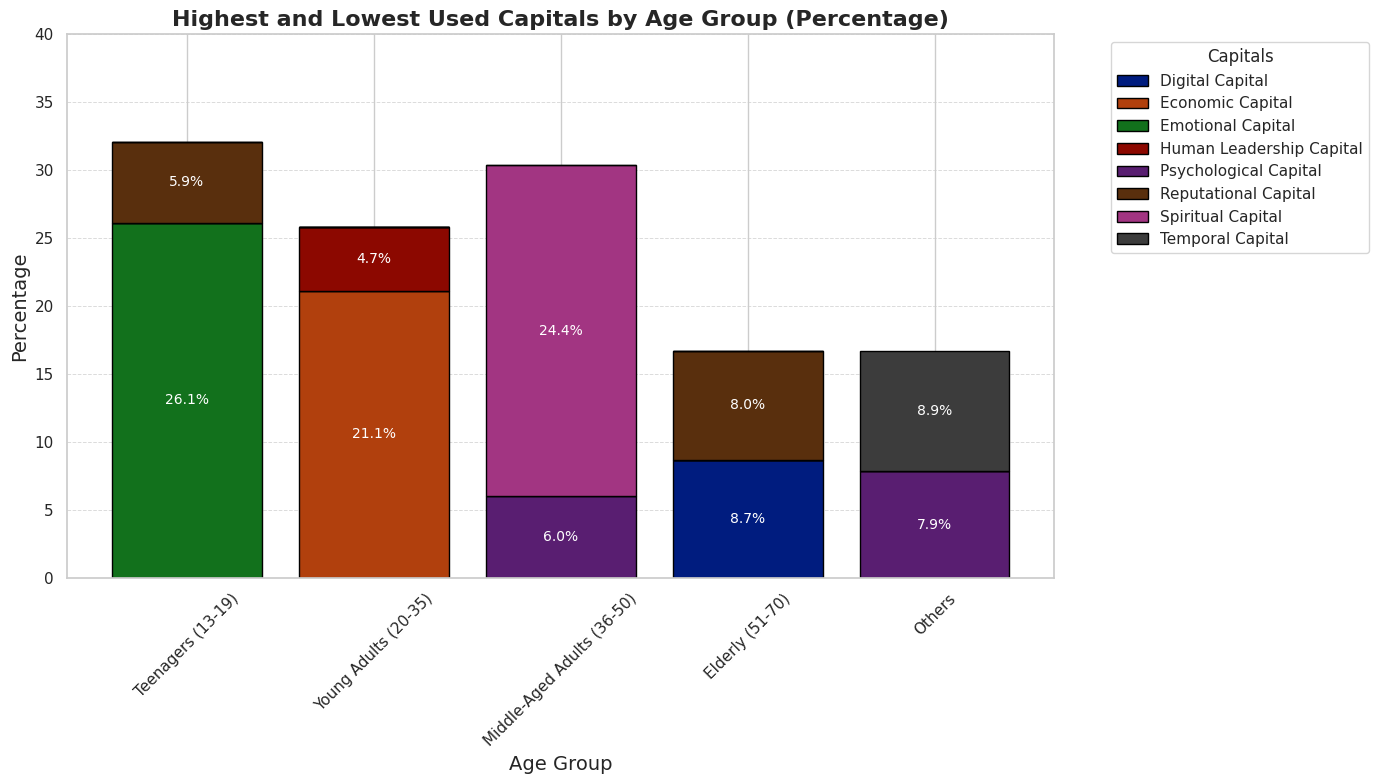

In [ ]:
# Group by age group and capital, and calculate the percentage of each capital's usage
capital_counts_by_age_group = df.groupby(['Age Group', 'Predicted Capital']).size().reset_index(name='Count')
total_counts_by_age_group = capital_counts_by_age_group.groupby('Age Group')['Count'].transform('sum')
capital_counts_by_age_group['Percentage'] = (capital_counts_by_age_group['Count'] / total_counts_by_age_group) * 100

# Find the highest and lowest used capital for each age group
highest_lowest_by_age_group = capital_counts_by_age_group.groupby('Age Group').apply(
    lambda x: pd.concat([x.nsmallest(1, 'Percentage'), x.nlargest(1, 'Percentage')])
).reset_index(drop=True)

# Custom order for age groups
age_group_order = ["Teenagers (13-19)", "Young Adults (20-35)", "Middle-Aged Adults (36-50)", "Elderly (51-70)", "Others"]

# Ensure that the data is sorted such that the lowest capital is plotted first and the highest capital second
highest_lowest_by_age_group = highest_lowest_by_age_group.sort_values(by=['Age Group', 'Percentage'], ascending=True)

# Pivot the data to create separate columns for highest and lowest capital per age group
highest_lowest_pivot = highest_lowest_by_age_group.pivot(
    index='Age Group',
    columns='Predicted Capital',
    values='Percentage'
).fillna(0)

# Reindex the pivot table to enforce the custom order of age groups
highest_lowest_pivot = highest_lowest_pivot.reindex(age_group_order)

# Create the plot
plt.figure(figsize=(14, 8))

# Define a dark color palette for the bars
colors = sns.color_palette("dark", n_colors=len(highest_lowest_by_age_group['Predicted Capital'].unique()))

# Set the Seaborn style
sns.set_theme(style="whitegrid")

# Initialize bottom values for stacking the bars
age_groups = highest_lowest_pivot.index
bottom_values = [0] * len(age_groups)  # Start stacking from zero

# Plot the bars, ensuring the lowest percentage capital is at the bottom
for i, capital in enumerate(highest_lowest_pivot.columns):
    bars = plt.bar(
        age_groups,
        highest_lowest_pivot[capital],
        bottom=bottom_values,
        color=colors[i],
        label=capital,
        edgecolor='black'  # Adds a border to bars for better contrast
    )
    # Add annotations for the values
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only annotate bars with non-zero height
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=10,
                color='white'  # White text for better visibility on dark bars
            )
    # Update bottom values to stack the next bar segment on top
    bottom_values = [bottom + value for bottom, value in zip(bottom_values, highest_lowest_pivot[capital])]

# Set the y-axis limit and add gridlines
plt.ylim(0, 40)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Enhance the plot with titles and labels
plt.title('Highest and Lowest Used Capitals by Age Group (Percentage)', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Capitals', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


# Count occurrences of each country

In [ ]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']


In [ ]:
country_counts

,Country,Count
0,Australia,17709
1,India,16957
2,Pakistan,13765
3,Sweden,13431
4,Germany,13246
5,UK,13192
6,Afghanistan,12622
7,Japan,12361
8,Canada,11774
9,Spain,11772


# Identify most and least used countries

In [ ]:
most_used_country = country_counts.iloc[0]
least_used_country = country_counts.iloc[-1]

In [ ]:
most_used_country

,0
Country,Australia
Count,17709


In [ ]:
least_used_country

,33
Country,Egypt
Count,5073


# Distribution of Capital Use by Country

In [ ]:
import plotly.express as px
fig = px.bar(country_counts, x='Country', y='Count',
             title='Distribution of Capitals Used by Countries',
             labels={'Country': 'Countries', 'Count': 'Count'},
             color='Count',
             color_continuous_scale=px.colors.sequential.Viridis)

# Add annotations for the most and least used countries
fig.add_annotation(
    x=most_used_country['Country'],
    y=most_used_country['Count'],
    text=f"Most Used: {most_used_country['Country']} ({most_used_country['Count']})",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color="red")
)

fig.add_annotation(
    x=least_used_country['Country'],
    y=least_used_country['Count'],
    text=f"Least Used: {least_used_country['Country']} ({least_used_country['Count']})",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40,
    font=dict(color="blue")
)

# Show the plot
fig.show()

<ipython-input-58-2760197719>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-58-2760197719>:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-58-2760197719>:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



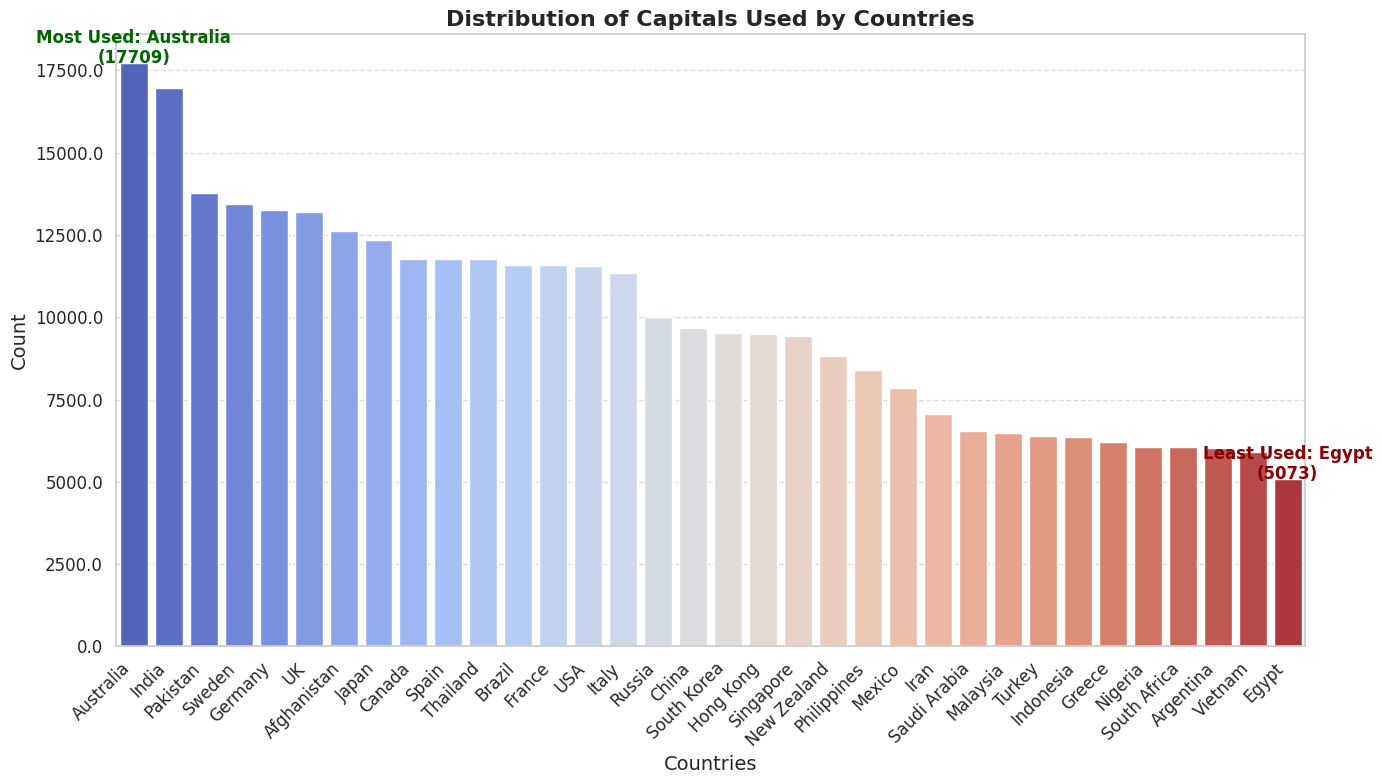

In [ ]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar plot with a color palette
barplot = sns.barplot(x='Country', y='Count', data=country_counts, palette='coolwarm')

# Add titles and labels
plt.title('Distribution of Capitals Used by Countries', fontsize=16, weight='bold')
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the bar plot
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right', fontsize=12)
barplot.set_yticklabels(barplot.get_yticks(), fontsize=12)

# Annotate the most and least used countries
plt.text(most_used_country.name, most_used_country['Count'] + 2,
         f'Most Used: {most_used_country["Country"]}\n({most_used_country["Count"]})',
         color='darkgreen', ha='center', fontsize=12, weight='bold')

plt.text(least_used_country.name, least_used_country['Count'] + 2,
         f'Least Used: {least_used_country["Country"]}\n({least_used_country["Count"]})',
         color='darkred', ha='center', fontsize=12, weight='bold')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
print(df.columns)


Index(['Capitals Text Generation', 'Sentiment Label', 'Predicted Capital',
       'User-Id', 'Social-Accounts', 'Date', 'Time', 'Day', 'Country',
       'Age-Of-User', 'Clean_Capitals Text Generation', 'Tokens',
       'Normalized_text', 'Text_without_stopwords', 'text_length', 'Month',
       'Age Group'],
      dtype='object')


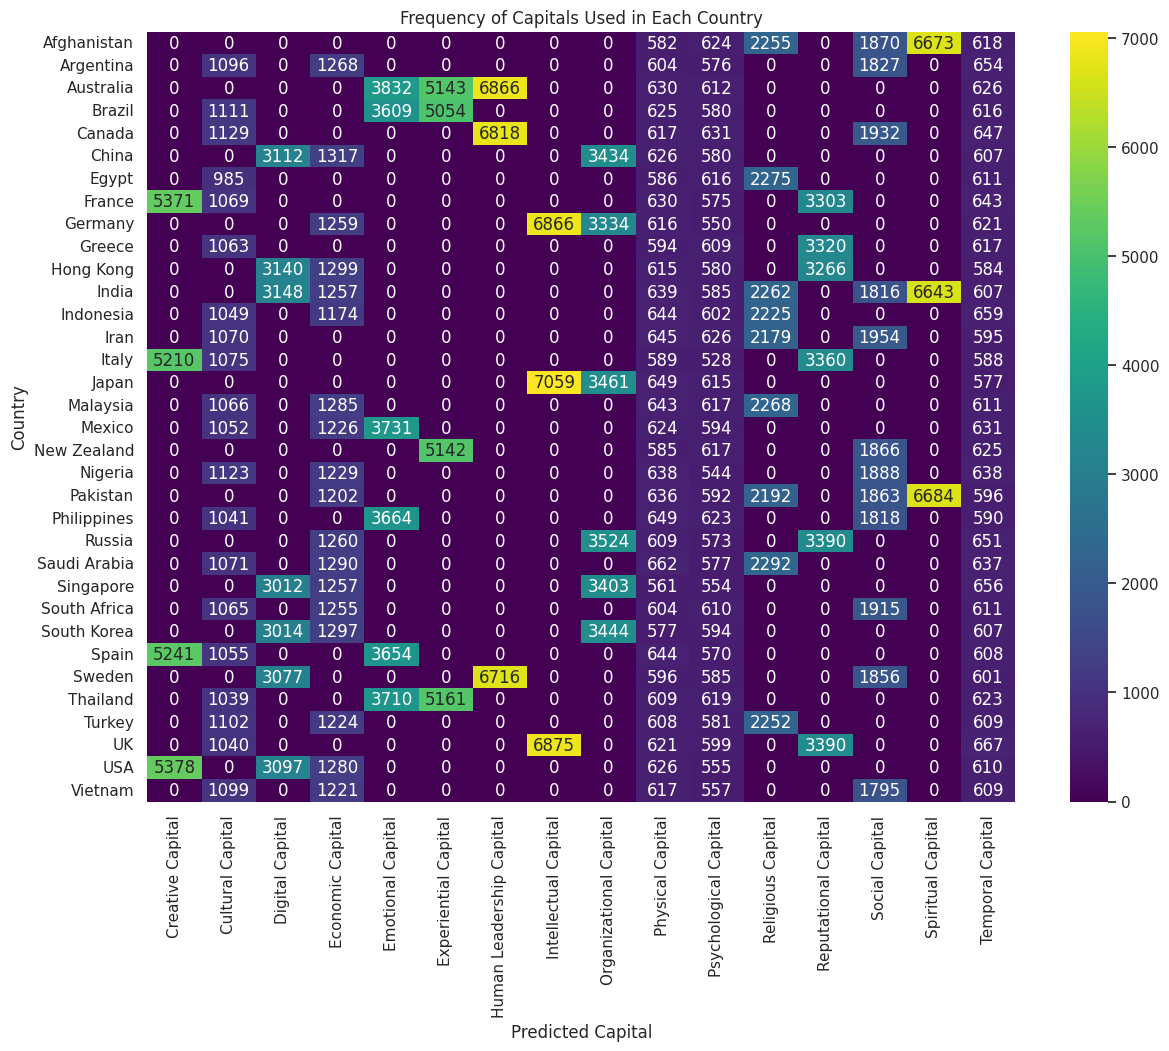

In [ ]:
# Grouping the data by Country and Predicted Capital and counting the occurrences
capital_country_counts = df.groupby(['Country', 'Predicted Capital']).size().reset_index(name='Counts')

# Creating a pivot table to prepare data for the heatmap
capital_country_pivot = capital_country_counts.pivot(index='Country', columns='Predicted Capital', values='Counts').fillna(0)

# Setting the size of the plot
plt.figure(figsize=(14, 10))

# Creating the heatmap
sns.heatmap(capital_country_pivot, annot=True, fmt='g', cmap='viridis')

# Adding labels and title
plt.title('Frequency of Capitals Used in Each Country')
plt.xlabel('Predicted Capital')
plt.ylabel('Country')

# Display the plot
plt.show()

# Word Frequency Distribution

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


<ipython-input-62-3851701519>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




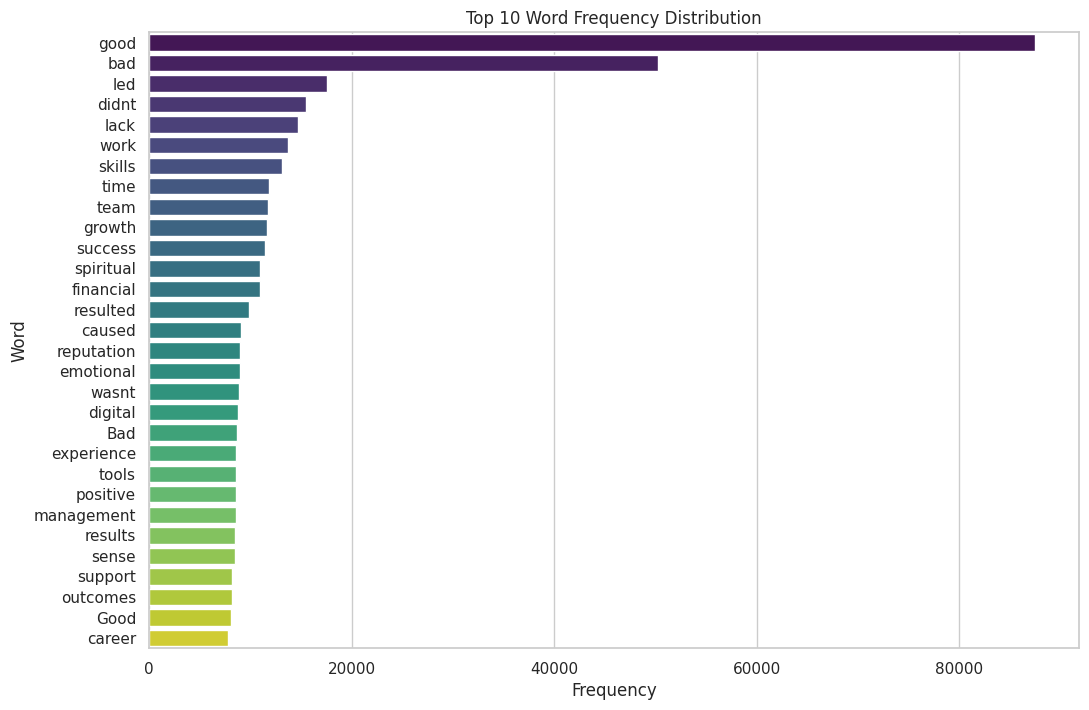

In [ ]:
# Tokenize the words
all_words = word_tokenize(' '.join(df['Text_without_stopwords']))

# Get the frequency distribution
word_freq = FreqDist(all_words)

# Convert the frequency distribution to a DataFrame
word_freq_df = pd.DataFrame(word_freq.most_common(30), columns=['Word', 'Frequency'])

# Create a seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')

plt.title('Top 10 Word Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


In [ ]:
print(df.columns)


Index(['Capitals Text Generation', 'Sentiment Label', 'Predicted Capital',
       'User-Id', 'Social-Accounts', 'Date', 'Time', 'Day', 'Country',
       'Age-Of-User', 'Clean_Capitals Text Generation', 'Tokens',
       'Normalized_text', 'Text_without_stopwords', 'text_length', 'Month',
       'Age Group'],
      dtype='object')


# Plot Age-Of-User and Country Relation
This graph shows the distribution of ages for users in different countries

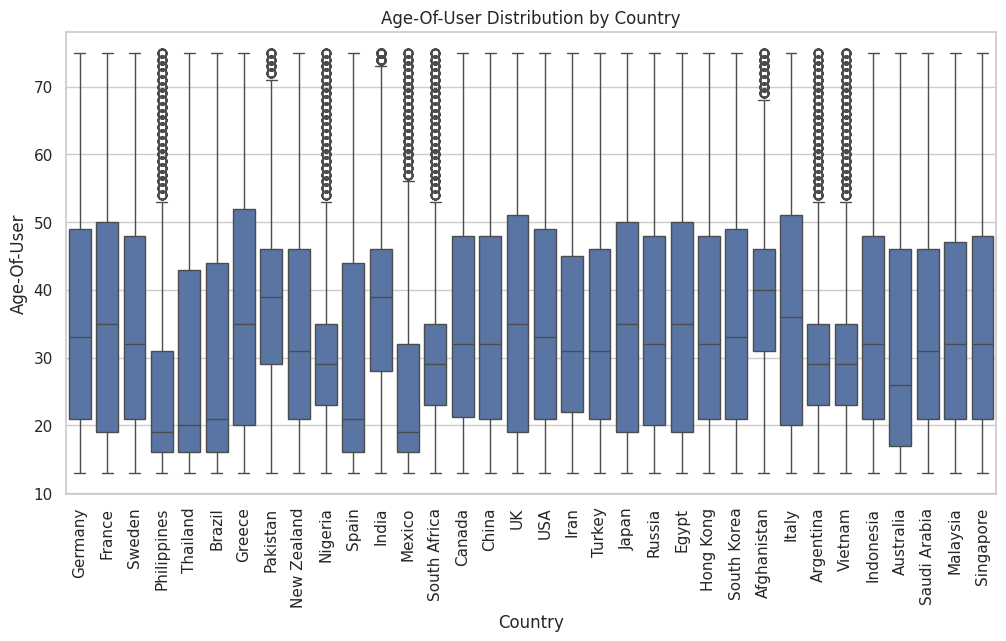

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Age-Of-User', data=df)
plt.title('Age-Of-User Distribution by Country')
plt.xticks(rotation=90)
plt.show()

# Plot Age-Of-User and Predicted Capital Relation
This graph displays the distribution of user ages for each predicted capital type.
This helps in understanding which age groups are associated with which types of predicted capital.

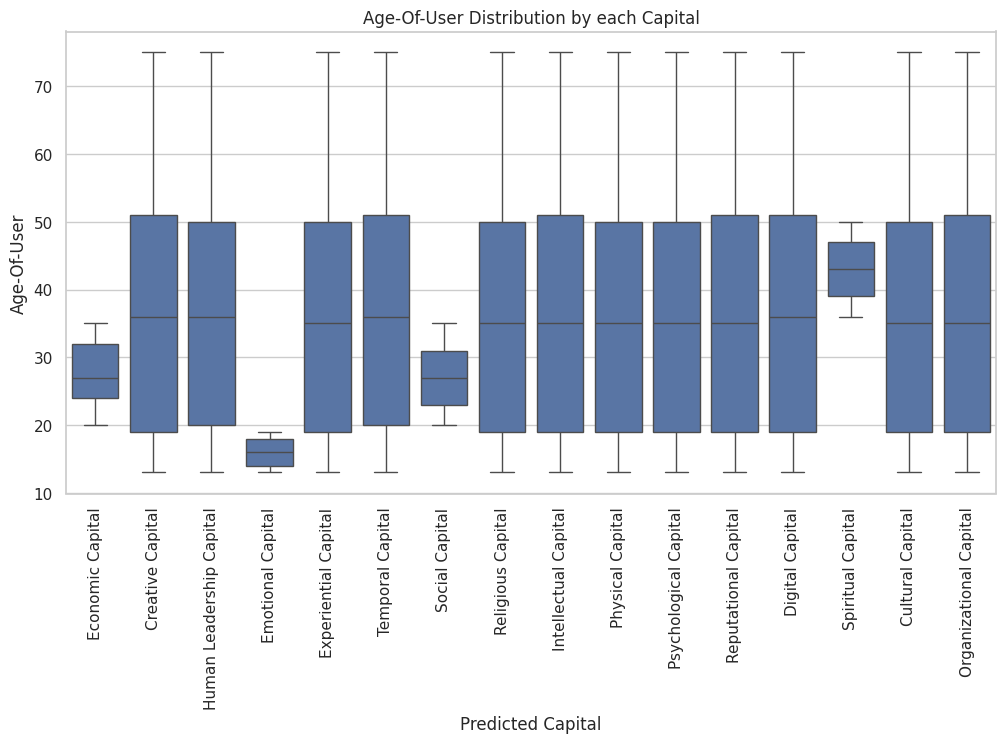

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Predicted Capital', y='Age-Of-User', data=df)
plt.title('Age-Of-User Distribution by each Capital')
plt.xticks(rotation=90)
plt.show()

# Plot the count of Predicted Capital by Age-Of-User and Country
This graph shows the count of each type of predicted capital for each country. The hue differentiates the types of predicted capital, making it clear how many messages of each type are generated by users from different countries.
Helps in understanding the distribution and popularity of different capital types across countries, providing insights into geographical trends and cultural preferences.

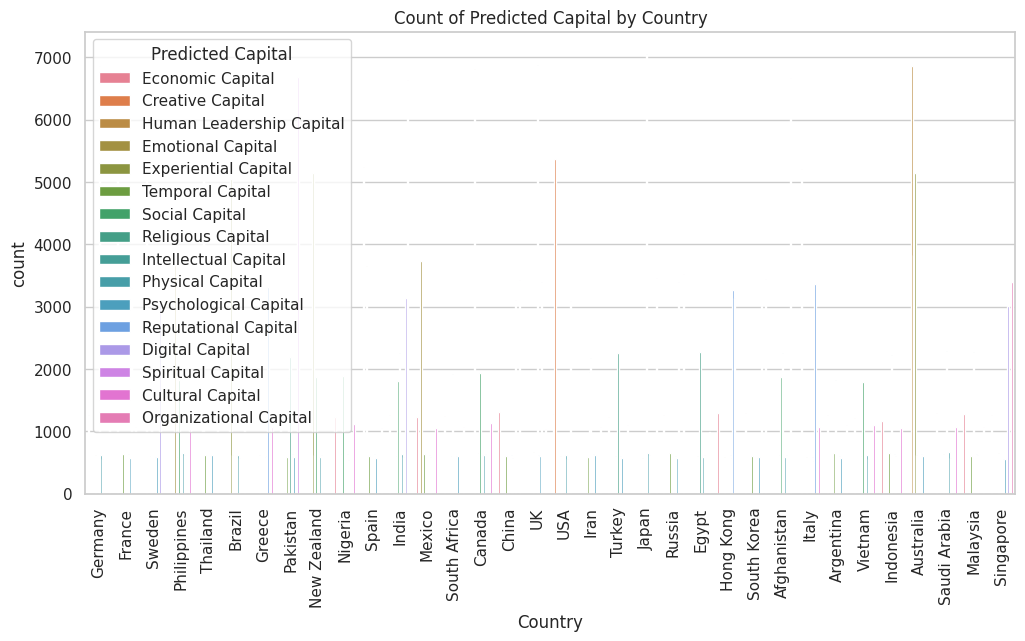

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Predicted Capital')
plt.title('Count of Predicted Capital by Country')
plt.xticks(rotation=90)
plt.show()

# Plot the count of Predicted Capital by Age-Of-User
## Purpose:
This histogram shows the count of each type of predicted capital for different ages. The stacking allows for a clear comparison of the distribution of capital types across different age groups.
## Usage:
Useful for identifying which age groups are most likely to generate specific types of capital messages, highlighting age-related trends in message generation.

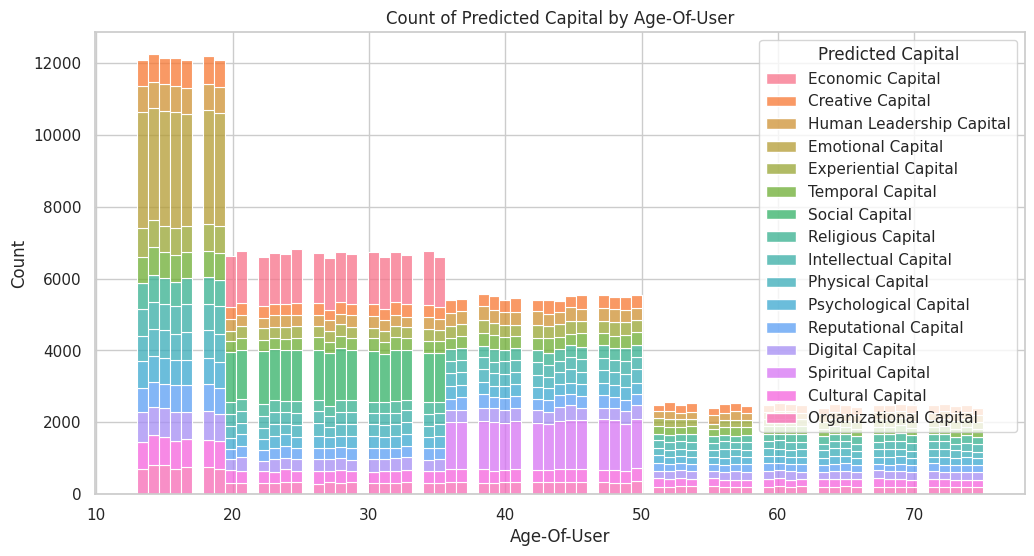

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age-Of-User', hue='Predicted Capital', multiple="stack")
plt.title('Count of Predicted Capital by Age-Of-User')
plt.show()

# Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['Text_without_stopwords']
y = df[['Predicted Capital', 'Sentiment Label']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Extraction

# Creating TF-IDF
Use TF-IDF to convert text data into numerical features:Term Frequency-Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_SVM_LR_withoutGS = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer_SVM_LR_withoutGS.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer_SVM_LR_withoutGS.transform(X_test)

# Encode Capital and Sentiment labels

In [ ]:
label_encoder_capital_SVM_LR_withoutGS = LabelEncoder()
label_encoder_sentiment_SVM_LR_withoutGS = LabelEncoder()
y_train['Capital'] = label_encoder_capital_SVM_LR_withoutGS.fit_transform(y_train['Predicted Capital'])
y_test['Capital'] = label_encoder_capital_SVM_LR_withoutGS.transform(y_test['Predicted Capital'])
y_train['Sentiment Label'] = label_encoder_sentiment_SVM_LR_withoutGS.fit_transform(y_train['Sentiment Label'])
y_test['Sentiment Label'] = label_encoder_sentiment_SVM_LR_withoutGS.transform(y_test['Sentiment Label'])

In [ ]:
y_test['Sentiment Label']

,Sentiment Label
34123,0
164971,1
101665,0
153996,1
17695,0
...,...
41297,0
239444,0
35393,1
10354,0


In [ ]:
y_train['Sentiment Label'].head()

,Sentiment Label
248000,1
315647,0
252663,0
275401,0
146065,1


In [ ]:
y_train['Capital'].head()

,Capital
248000,15
315647,6
252663,8
275401,5
146065,15


In [ ]:
y_test['Capital']

,Capital
34123,11
164971,8
101665,11
153996,6
17695,7
...,...
41297,14
239444,4
35393,2
10354,1


# Step 3: Model Training

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Model for Capital Prediction

In [ ]:
capital_model_SVM_withoutGS = SVC()
capital_model_SVM_withoutGS.fit(X_train_tfidf, y_train['Capital'])

SVC()

# Predict on the test set for Capital Prediction

In [ ]:
y_test_capital_pred = capital_model_SVM_withoutGS.predict(X_test_tfidf)

# Evaluate and print metrics for Capital Prediction

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def print_evaluation_metrics(y_true, y_pred, label):
    print(f"--- {label} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.2f}")
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))

In [ ]:
print_evaluation_metrics(y_test['Capital'], y_test_capital_pred, "Capital Prediction")

--- Capital Prediction ---
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4252
           1       1.00      1.00      1.00      4220
           2       1.00      1.00      1.00      4286
           3       1.00      1.00      1.00      4565
           4       1.00      1.00      1.00      4444
           5       1.00      1.00      1.00      4088
           6       1.00      1.00      1.00      3999
           7       1.00      1.00      1.00      4074
           8       1.00      1.00      1.00      4157
           9       1.00      1.00      1.00      4305
          10       1.00      1.00      1.00      3988
          11       1.00      1.00      1.00      4025
          12       1.00      1.00      1.00      3971
          13       1.00      1.00      1.00      4534
          14       1.00      1.00      1.00      4058
          15       1.00 

# Visualization of Accuracy, Precision, Recall, and F1-Score for Capital Prediction

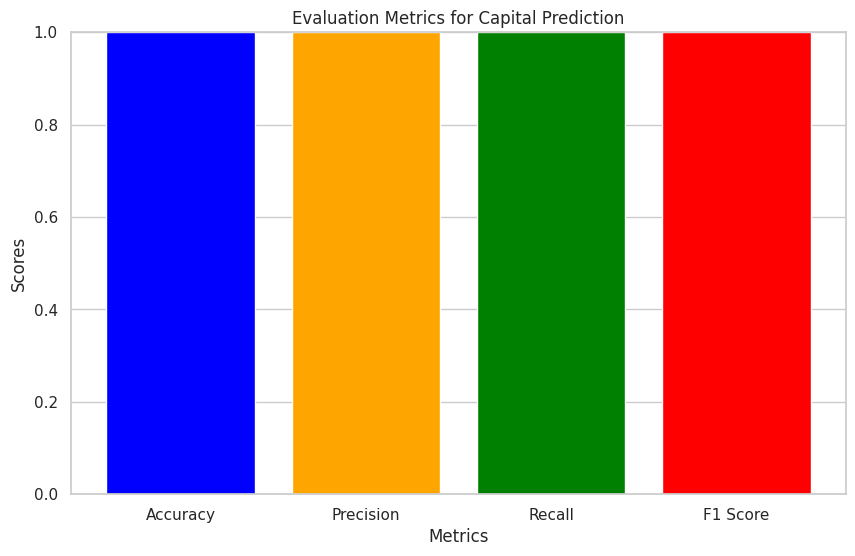

In [ ]:
def plot_metrics_bar_chart(y_true, y_pred, title):
    """
    Plots evaluation metrics as a bar chart.

    Parameters:
    - y_true: array-like of shape (n_samples,) - True labels
    - y_pred: array-like of shape (n_samples,) - Predicted labels
    - title: str - Title for the plot
    """
    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Prepare metrics for plotting
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title(title)
    plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for percentage-like metrics
    plt.show()

# Use the functions
# print_evaluation_metrics(y_test['Capital'], y_test_capital_pred, "Capital Prediction")
plot_metrics_bar_chart(y_test['Capital'], y_test_capital_pred, "Evaluation Metrics for Capital Prediction")

In [ ]:
# Ensure `capital_labels` are the same type as `y_true` and `y_pred`
import numpy as np
capital_labels = label_encoder_capital_SVM_LR_withoutGS.classes_

# Check the types and unique values
print("Unique values in y_test['Capital']:", y_test['Capital'].unique())
print("Unique values in y_test_capital_pred:", np.unique(y_test_capital_pred))
print("Labels from label_encoder_capital_SVM_LR_withoutGS:", capital_labels)

Unique values in y_test['Capital']: [11  8  6  7  3  5 10 13  2  0 15  1 14  9 12  4]
Unique values in y_test_capital_pred: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Labels from label_encoder_capital_SVM_LR_withoutGS: ['Creative Capital' 'Cultural Capital' 'Digital Capital'
 'Economic Capital' 'Emotional Capital' 'Experiential Capital'
 'Human Leadership Capital' 'Intellectual Capital'
 'Organizational Capital' 'Physical Capital' 'Psychological Capital'
 'Religious Capital' 'Reputational Capital' 'Social Capital'
 'Spiritual Capital' 'Temporal Capital']


# Plot Confusion Matrix for Capital Prediction

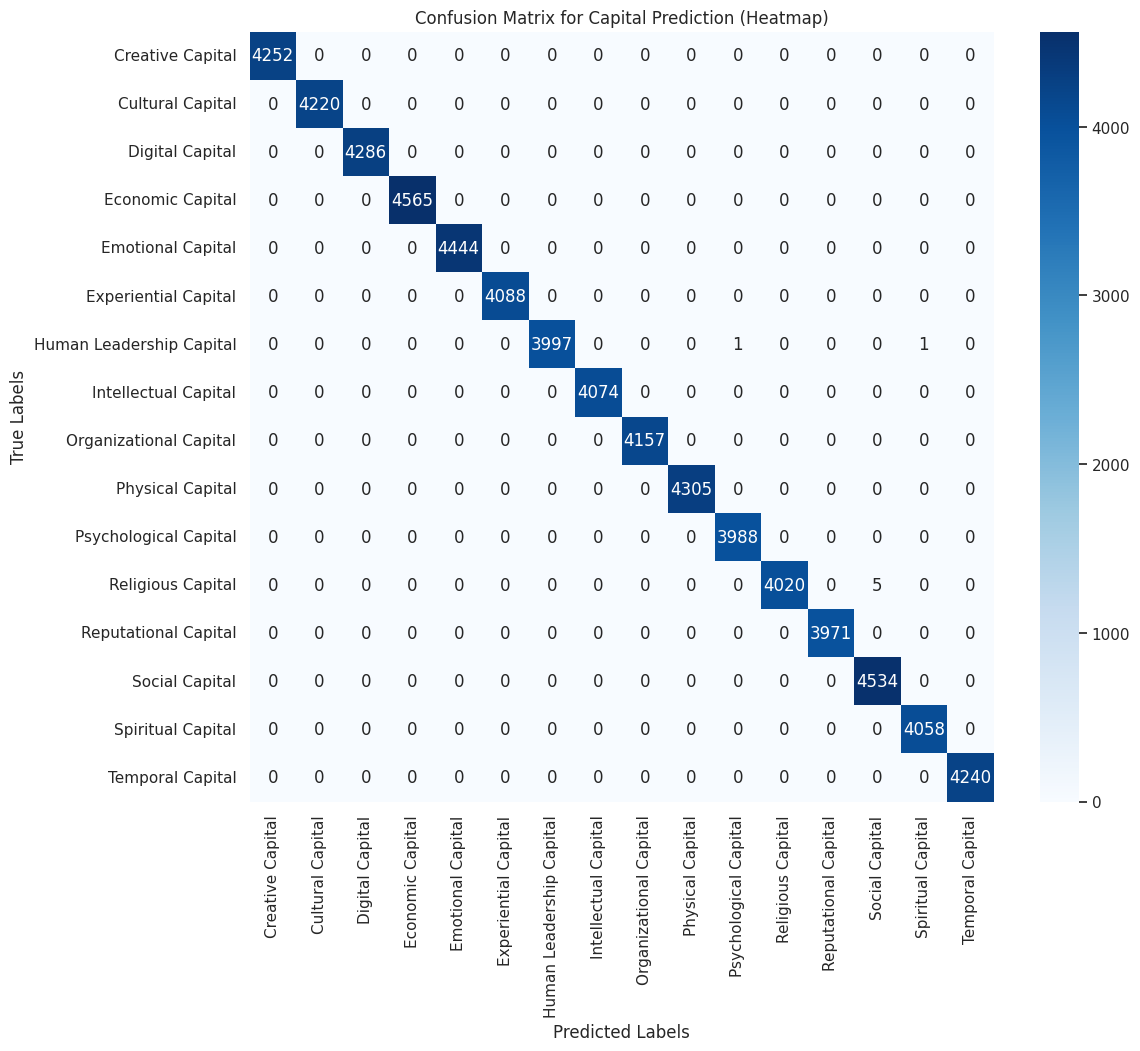

In [ ]:
def plot_confusion_matrix_heatmap(y_true, y_pred, title, labels):
    """
    Plots a confusion matrix as a heatmap.

    Parameters:
    - y_true: array-like of shape (n_samples,) - True labels
    - y_pred: array-like of shape (n_samples,) - Predicted labels
    - title: str - Title for the plot
    - labels: list - List of labels to index the matrix (must match the encoding)
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Use the original string labels
capital_labels = label_encoder_capital_SVM_LR_withoutGS.classes_

# Plot confusion matrix heatmap
plot_confusion_matrix_heatmap(
    y_test['Capital'].values,
    y_test_capital_pred,
    "Confusion Matrix for Capital Prediction (Heatmap)",
    labels=capital_labels
)

# Model for Sentiment Prediction

In [ ]:
sentiment_model_LR_withoutGS = LogisticRegression(max_iter=1000)
sentiment_model_LR_withoutGS.fit(X_train_tfidf, y_train['Sentiment Label'])

LogisticRegression(max_iter=1000)

# Predict on the test set for Sentiment Prediction

In [ ]:
y_test_sentiment_pred = sentiment_model_LR_withoutGS.predict(X_test_tfidf)

# Evaluate and print metrics for Sentiment Prediction

In [ ]:
print_evaluation_metrics(y_test['Sentiment Label'], y_test_sentiment_pred, "Sentiment Prediction")

--- Sentiment Prediction ---
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     32359
           1       0.97      0.97      0.97     34847

    accuracy                           0.97     67206
   macro avg       0.97      0.97      0.97     67206
weighted avg       0.97      0.97      0.97     67206



# Plot Confusion Matrix for Sentiment Prediction

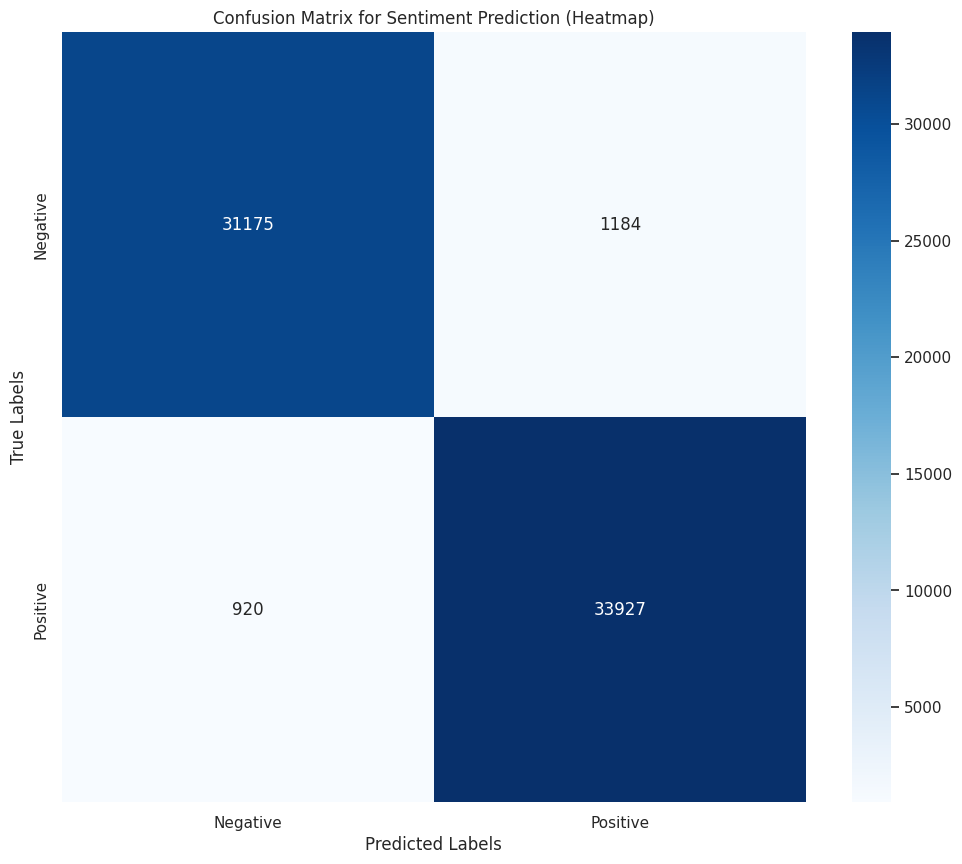

In [ ]:
sentiment_labels = label_encoder_sentiment_SVM_LR_withoutGS.classes_
plot_confusion_matrix_heatmap(y_test['Sentiment Label'], y_test_sentiment_pred, "Confusion Matrix for Sentiment Prediction (Heatmap)", labels=sentiment_labels)

# Visualization of Accuracy, Precision, Recall, and F1-Score for Sentiment Prediction

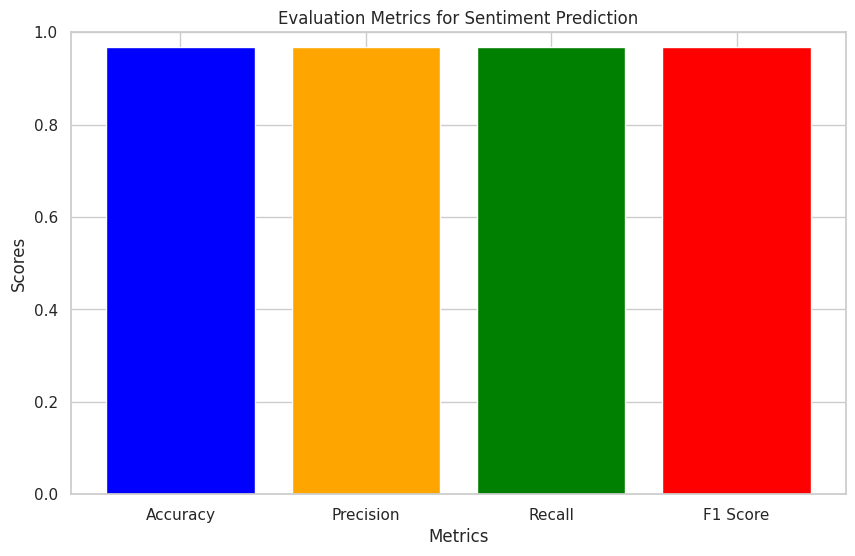

In [ ]:
plot_metrics_bar_chart(y_test['Sentiment Label'], y_test_sentiment_pred, "Evaluation Metrics for Sentiment Prediction")

# Save the trained models and vectorizer

In [ ]:
# Save models, vectorizer, and label encoders
with open('capital_model_SVM_withoutGS.pkl', 'wb') as f:
    pickle.dump(capital_model_SVM_withoutGS, f)

with open('sentiment_model_LR_withoutGS.pkl', 'wb') as f:
    pickle.dump(sentiment_model_LR_withoutGS, f)

with open('tfidf_vectorizer_SVM_LR_withoutGS.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer_SVM_LR_withoutGS, f)

with open('label_encoder_capital_SVM_LR_withoutGS.pkl', 'wb') as f:
    pickle.dump(label_encoder_capital_SVM_LR_withoutGS, f)

with open('label_encoder_sentiment_SVM_LR_withoutGS.pkl', 'wb') as f:
    pickle.dump(label_encoder_sentiment_SVM_LR_withoutGS, f)

# Evaluate Sentiment Prediction Model

# Step 4: Prediction Pipeline
Create a pipeline to first predict the capital and then predict the sentiment:

In [ ]:
def predict_pipeline(text):
    clean_text = remove_unnecessary_characters(text)
    tokens = tokenize_text(clean_text)
    text_without_stopwords = ' '.join([word for word in tokens if word.lower() not in stop_words])
    text_tfidf = tfidf_vectorizer_SVM_LR_withoutGS.transform([text_without_stopwords])

    capital_prediction_encoded = capital_model_SVM_withoutGS.predict(text_tfidf)
    sentiment_prediction_encoded = sentiment_model_LR_withoutGS.predict(text_tfidf)

    capital_prediction = label_encoder_capital_SVM_LR_withoutGS.inverse_transform(capital_prediction_encoded)[0]
    sentiment_prediction = label_encoder_sentiment_SVM_LR_withoutGS.inverse_transform(sentiment_prediction_encoded)[0]

    return capital_prediction, sentiment_prediction

# Test the pipeline

In [ ]:
test_sentence = "Leaders' focus on achieving excellence motivated the team to perform their best. This is a core aspect of quality leadership. 🔝"
capital, sentiment = predict_pipeline(test_sentence)
print(f"Predicted Capital: {capital}, Predicted Sentiment: {sentiment}")

Predicted Capital: Human Leadership Capital, Predicted Sentiment: Positive


# Function to predict capital and sentiment

In [ ]:
import tkinter as tk
from tkinter import messagebox, font

In [ ]:

def predict():
    text = entry.get()
    if not text:
        messagebox.showwarning("Input Error", "Please enter a sentence.")
        return
    predicted_capital, predicted_sentiment = predict_pipeline(text)

    result_text = f"Predicted Capital: {predicted_capital}\nPredicted Sentiment: {predicted_sentiment}"
    result_window = tk.Toplevel(root)
    result_window.title("Prediction Result")

    result_label = tk.Label(result_window, text=result_text, font=("Helvetica", 14), padx=20, pady=20)
    result_label.pack()

    close_button = tk.Button(result_window, text="Close", command=result_window.destroy, font=("Helvetica", 12), padx=10, pady=5)
    close_button.pack(pady=10)

# Set up the GUI

In [ ]:
root = tk.Tk()
root.title("Capital and Sentiment Prediction")
# Set window size and position
root.geometry("500x250+300+200")

label = tk.Label(root, text="Enter a sentence:", font=("Helvetica", 14))
label.pack(pady=20)


entry = tk.Entry(root, width=50, font=("Helvetica", 12))
entry.pack(pady=10)

predict_button = tk.Button(root, text="Predict", command=predict, font=("Helvetica", 12), padx=10, pady=5)
predict_button.pack(pady=20)

root.mainloop()

TclError: no display name and no $DISPLAY environment variable

In [ ]:
import gradio as gr

def predict_ui(text):
    capital, sentiment = predict_pipeline(text)
    return f"Capital: {capital}", f"Sentiment: {sentiment}"

iface = gr.Interface(fn=predict_ui,
                     inputs=gr.Textbox(lines=2, placeholder="Enter your sentence here..."),
                     outputs=["text", "text"],
                     title="Capital and Sentiment Prediction")

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://630c679ac7bd0064a2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Thank You!